In [2]:
# Importing necessary library
library(tidyverse)
library(urca)
library(cowplot)
library(forecast)
library(tseries)

In [3]:
# Importing the dataset
riceData <- read.csv('C:/Users/ASUS/Desktop/rice/rice_90-19.csv')

In [4]:
# Renamig the columns for easy access
names(riceData) <- make.names(c('Year','Rice_production','Population','Labor_Force',
                                'Ferti_consump','Avg_temp','Avg_rain',
                                'per_cap_inc','Pop_male','Pop_female','m_f_ratio','Agr_land','Unempoyment'))

In [5]:
riceData <-riceData[,-c(14:31)]
riceData <-riceData[-c(30:32),]
riceData

,Year,Rice_production,Population,Labor_Force,Ferti_consump,Avg_temp,Avg_rain,per_cap_inc,Pop_male,Pop_female,m_f_ratio,Agr_land,Unempoyment
,<int>,<dbl>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1990,18781.93,103171957,35272754,98.73329,25.58,2526.80,306.2687,51.58004,48.41996,1.065264,79.78797,NA
2,1991,19109.19,105599125,36309530,107.02184,25.25,2563.90,293.1604,51.56115,48.43885,1.064458,79.28094,2.200
3,1992,19284.69,107983708,37387956,116.01371,25.09,1708.59,293.6450,51.54176,48.45824,1.063633,73.35792,2.333
4,1993,18917.89,110350641,38509688,111.16659,25.08,2600.67,300.5557,51.52227,48.47773,1.062803,72.56664,2.356
5,1994,17736.89,112737684,39678222,124.80578,25.48,1758.22,299.5330,51.50290,48.49710,1.061979,71.89060,2.376
6,1995,18476.12,115169933,40895568,142.19419,25.75,2303.87,329.4241,51.48375,48.51625,1.061165,72.01352,2.482
7,1996,19747.29,117649927,42090789,147.24482,25.65,2103.97,394.7175,51.46452,48.53548,1.060348,71.65245,2.510
8,1997,19641.79,120160571,43331123,132.20501,25.22,2137.65,401.4987,51.44491,48.55509,1.059516,71.94438,2.687
9,1998,20442.80,122682818,44603763,138.45517,25.92,2493.47,407.4292,51.42493,48.57507,1.058669,72.47446,2.900


In [6]:
# Selecting the important columns for analysis
df <- riceData[c('Year','Rice_production','Population',
                       'Labor_Force','Ferti_consump','Avg_temp','Avg_rain','per_cap_inc')]
df

,Year,Rice_production,Population,Labor_Force,Ferti_consump,Avg_temp,Avg_rain,per_cap_inc
,<int>,<dbl>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
1,1990,18781.93,103171957,35272754,98.73329,25.58,2526.80,306.2687
2,1991,19109.19,105599125,36309530,107.02184,25.25,2563.90,293.1604
3,1992,19284.69,107983708,37387956,116.01371,25.09,1708.59,293.6450
4,1993,18917.89,110350641,38509688,111.16659,25.08,2600.67,300.5557
5,1994,17736.89,112737684,39678222,124.80578,25.48,1758.22,299.5330
6,1995,18476.12,115169933,40895568,142.19419,25.75,2303.87,329.4241
7,1996,19747.29,117649927,42090789,147.24482,25.65,2103.97,394.7175
8,1997,19641.79,120160571,43331123,132.20501,25.22,2137.65,401.4987
9,1998,20442.80,122682818,44603763,138.45517,25.92,2493.47,407.4292


In [12]:
options(repr.plot.width = 7, repr.plot.height = 7)
jpeg('C:/Users/ASUS/Desktop/viz/plot.jpg',width = 350, height = 350)
plot(df) 
dev.off()

png 
  2

In [7]:
# Creating a new dataset with the yearly change rate in percentage
p <- ((df$Rice_production - lag(df$Rice_production))/lag(df$Rice_production))*100
q <- ((df$Population - lag(df$Population))/lag(df$Population))*100
o <- ((df$Labor_Force - lag(df$Labor_Force))/lag(df$Labor_Force))*100
r <- ((df$Ferti_consump - lag(df$Ferti_consump))/lag(df$Ferti_consump))*100
s <- ((df$Avg_temp - lag(df$Avg_temp))/lag(df$Avg_temp))*100
t <- ((df$Avg_rain - lag(df$Avg_rain))/lag(df$Avg_rain))*100
u <- ((df$per_cap_inc - lag(df$per_cap_inc))/lag(df$per_cap_inc))*100

df2 <- data.frame(Year = df$Year, chng_rice = p, chng_pop = q, chng_labor = o,
                  chng_fert = r, chng_temp = s, chng_rain = t, chng_inc = u)
df2 <- df2[-1,]
df2

,Year,chng_rice,chng_pop,chng_labor,chng_fert,chng_temp,chng_rain,chng_inc
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2,1991,1.7424194,2.352546,2.939311,8.394891,-1.29007037,1.4682603,-4.2799932
3,1992,0.9184063,2.258147,2.970091,8.401895,-0.63366337,-33.3597254,0.1652906
4,1993,-1.9020269,2.191935,3.000250,-4.178057,-0.03985652,52.2114726,2.3534405
5,1994,-6.2427681,2.163144,3.034390,12.269147,1.59489633,-32.3935755,-0.3402732
6,1995,4.1677543,2.157441,3.068046,13.932378,1.05965463,31.0342278,9.9792127
7,1996,6.8800701,2.153335,2.922617,3.551925,-0.38834951,-8.6767048,19.8204747
8,1997,-0.5342505,2.133995,2.946806,-10.214158,-1.67641326,1.6007833,1.7179820
9,1998,4.0780906,2.099064,2.937011,4.727630,2.77557494,16.6453816,1.4770930
10,1999,17.0331853,2.043348,2.893242,16.925588,0.69444444,0.2033311,0.5188651


In [13]:
# visualization 
jpeg('C:/Users/ASUS/Desktop/viz/rice_rain.jpg',width = 350, height = 350)
color <- c('Change of rice production'= 'blue', 'Change of average rainfall'= 'red')
options(repr.plot.width = 6, repr.plot.height = 4,repr.plot.res = 400)
plt <- ggplot(df2,aes(x= Year)) +geom_point(aes(y = chng_rice,color = 'Change of rice production'))+ 
                                  geom_line(aes(y = chng_rice,color = 'Change of rice production'))+
                                  geom_line(aes(y = chng_rain,,color = 'Change of average rainfall' ))+
                                  geom_point(aes(y = chng_rain,,color = 'Change of average rainfall'))+
                                  labs(x= 'Year',y = 'Change(%)',color = 'Legend')+
                                  scale_color_manual(values = color) + ggtitle('Rate of change in Rice production vs Rainfall')+
                                  theme(text = element_text(size = 7), plot.title = element_text(hjust = 0.5,,face = 'bold'),
                                        aspect.ratio =.6)
plt
dev.off()

png 
  2

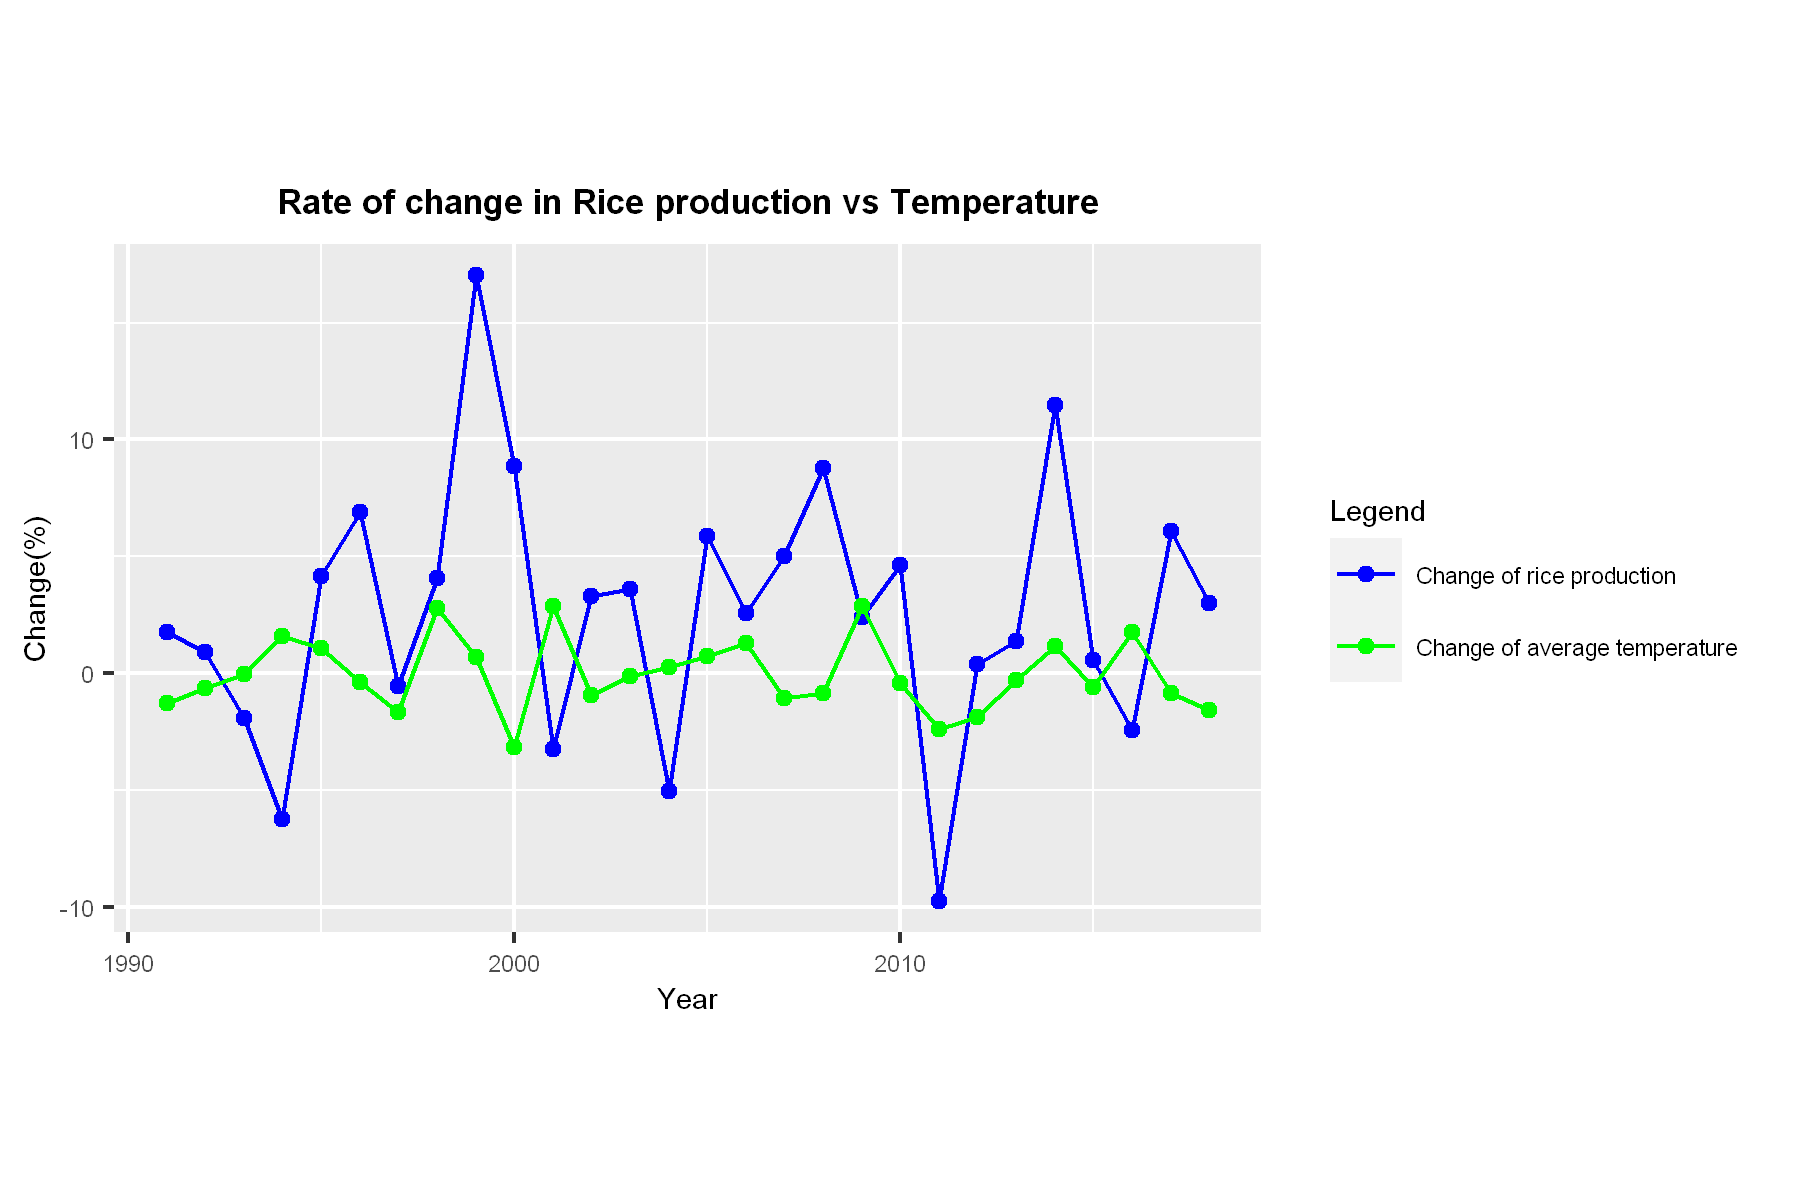

In [78]:
color <- c('Change of rice production'= 'blue', 'Change of average temperature'= 'green')
plt <- ggplot(df2,aes(x= Year)) +geom_point(aes(y = chng_rice,color = 'Change of rice production'))+ 
                                  geom_line(aes(y = chng_rice,color = 'Change of rice production'))+
                                  geom_line(aes(y = chng_temp,,color = 'Change of average temperature' ))+
                                  geom_point(aes(y = chng_temp,,color = 'Change of average temperature'))+
                                  labs(x= 'Year',y = 'Change(%)',color = 'Legend')+
                                  scale_color_manual(values = color) + ggtitle('Rate of change in Rice production vs Temperature')+
                                  theme(text = element_text(size = 7), plot.title = element_text(hjust = 0.5,,face = 'bold'),
                                        aspect.ratio =.6)
plt

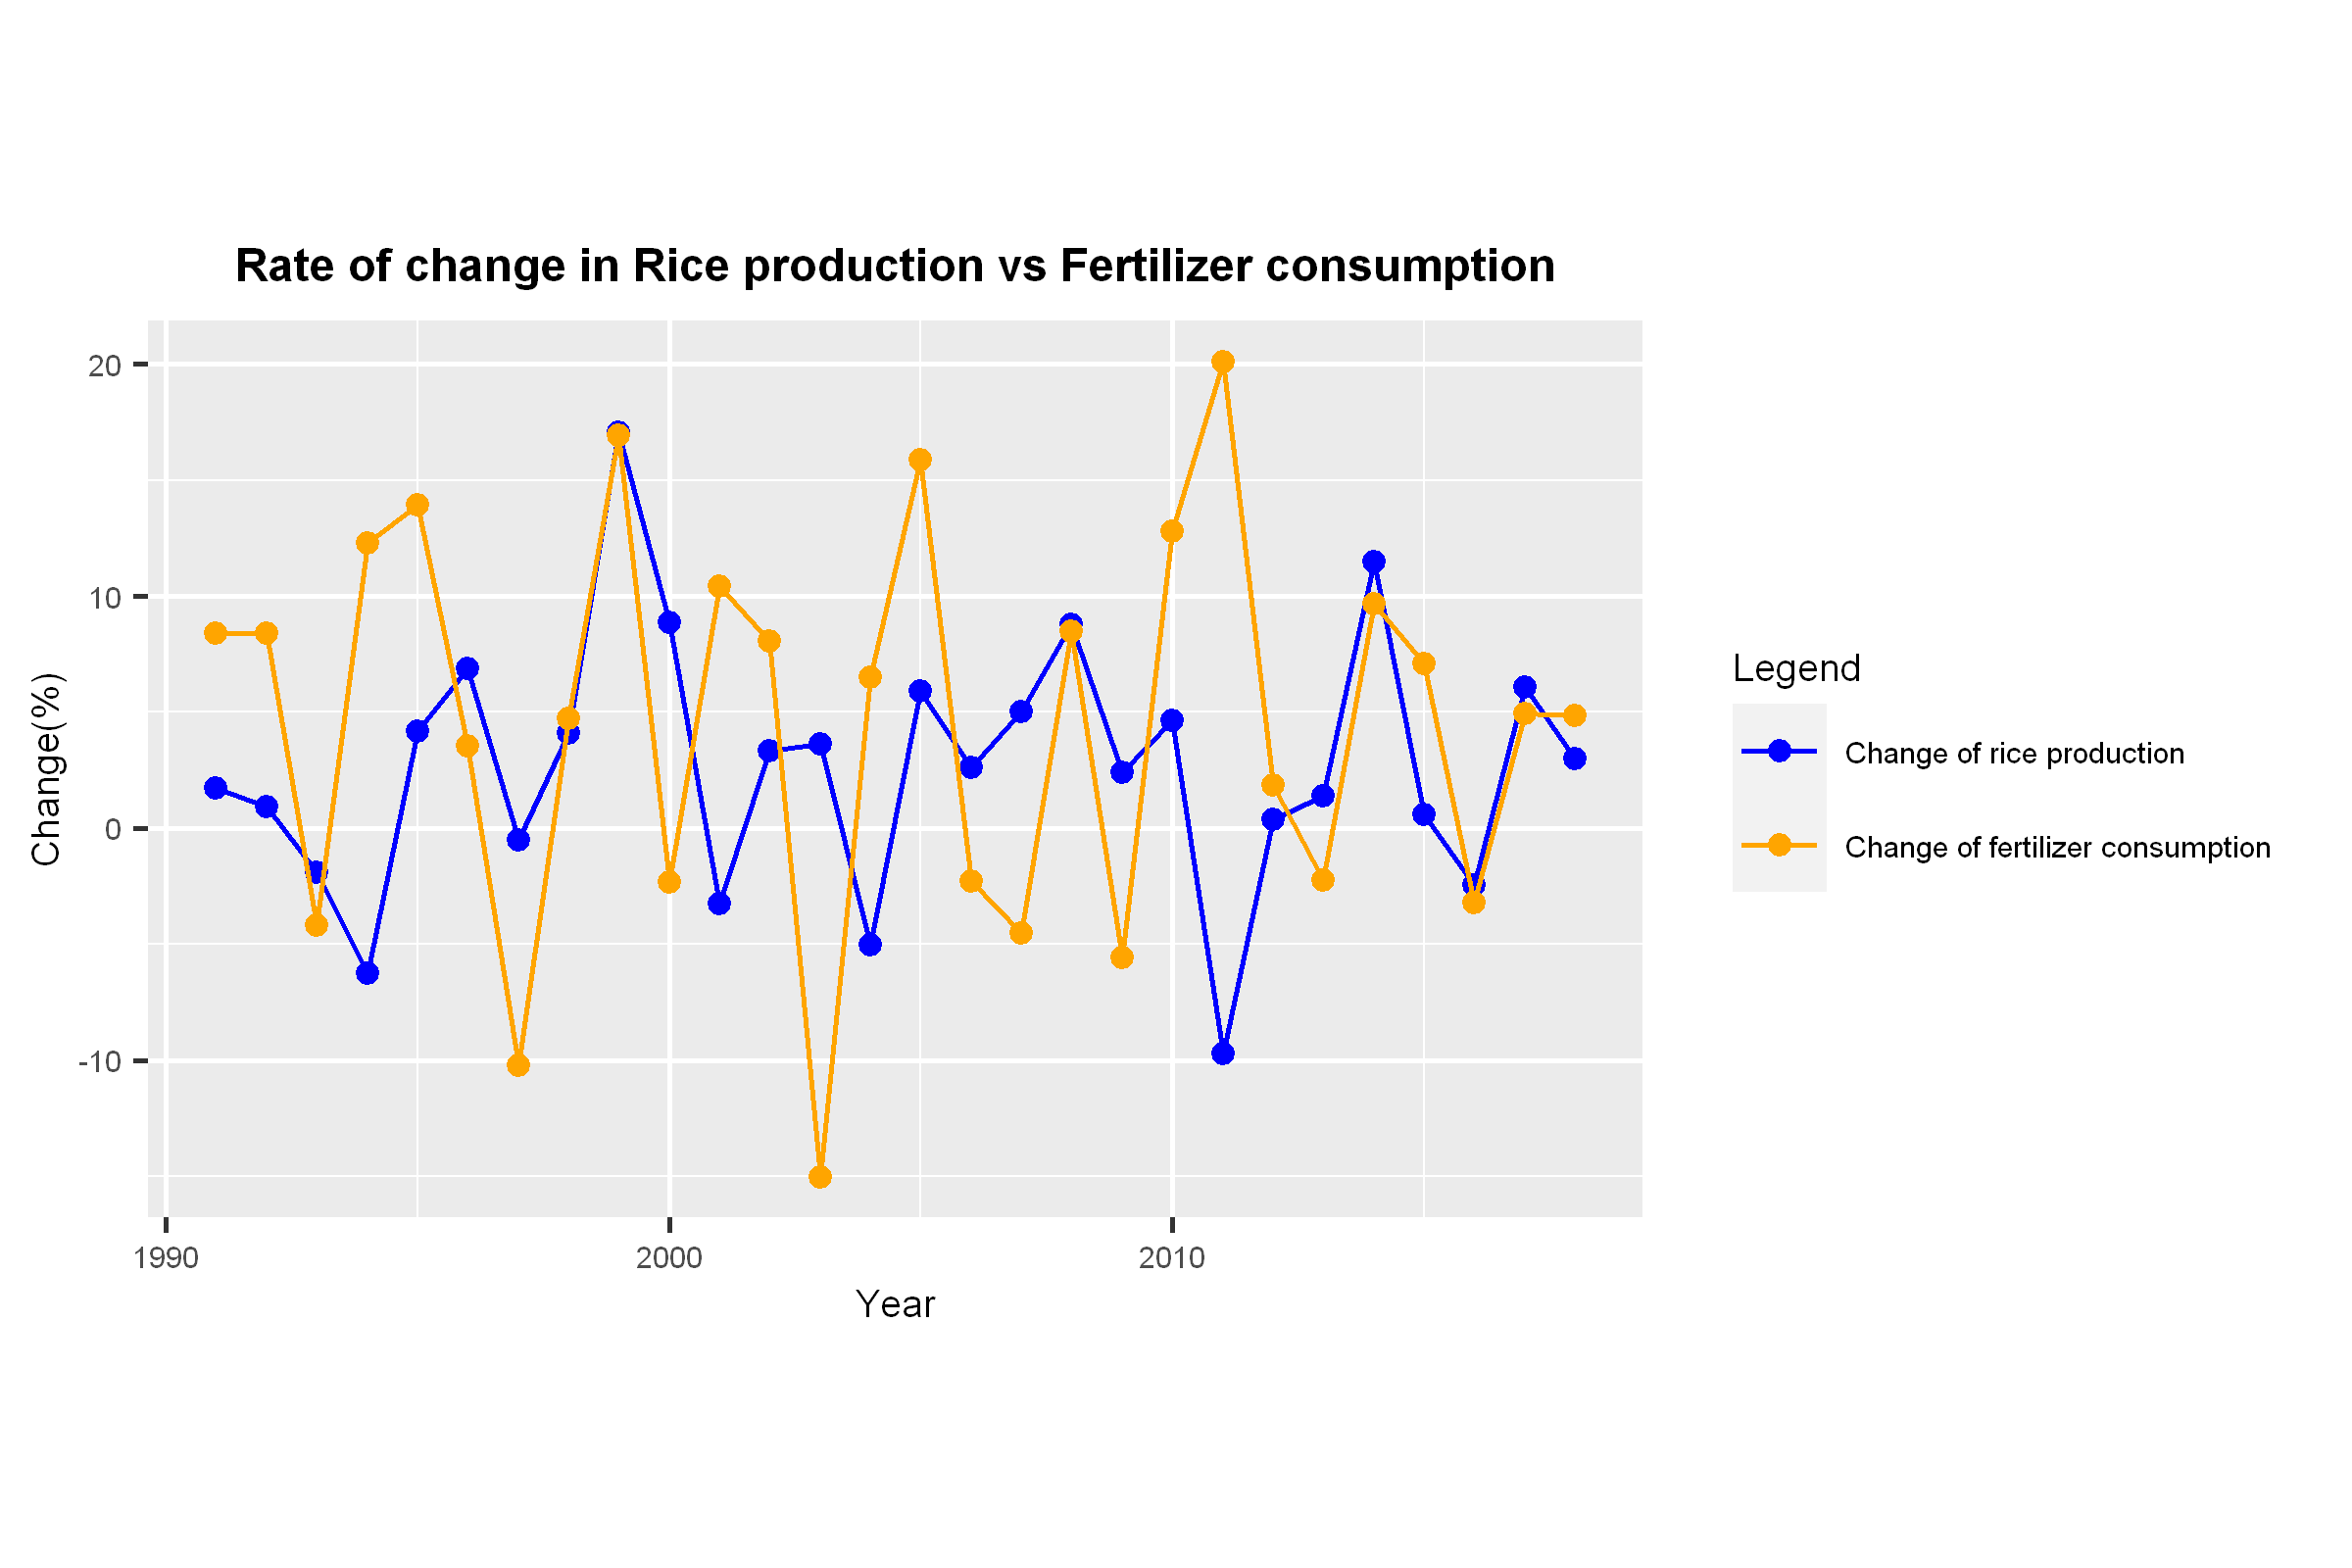

In [14]:
color <- c('Change of rice production'= 'blue', 'Change of fertilizer consumption'= 'orange')
options(repr.plot.width = 6, repr.plot.height = 4,repr.plot.res = 400)
plt <- ggplot(df2,aes(x= Year)) +geom_point(aes(y = chng_rice,color = 'Change of rice production'))+ 
                                  geom_line(aes(y = chng_rice,color = 'Change of rice production'))+
                                  geom_line(aes(y = chng_fert,,color = 'Change of fertilizer consumption' ))+
                                  geom_point(aes(y = chng_fert,,color = 'Change of fertilizer consumption'))+
                                  labs(x= 'Year',y = 'Change(%)',color = 'Legend')+
                                  scale_color_manual(values = color) + ggtitle('Rate of change in Rice production vs Fertilizer consumption')+
                                  theme(text = element_text(size = 7), plot.title = element_text(hjust = 0.5,,face = 'bold'),
                                       aspect.ratio = .6)
                                
plt

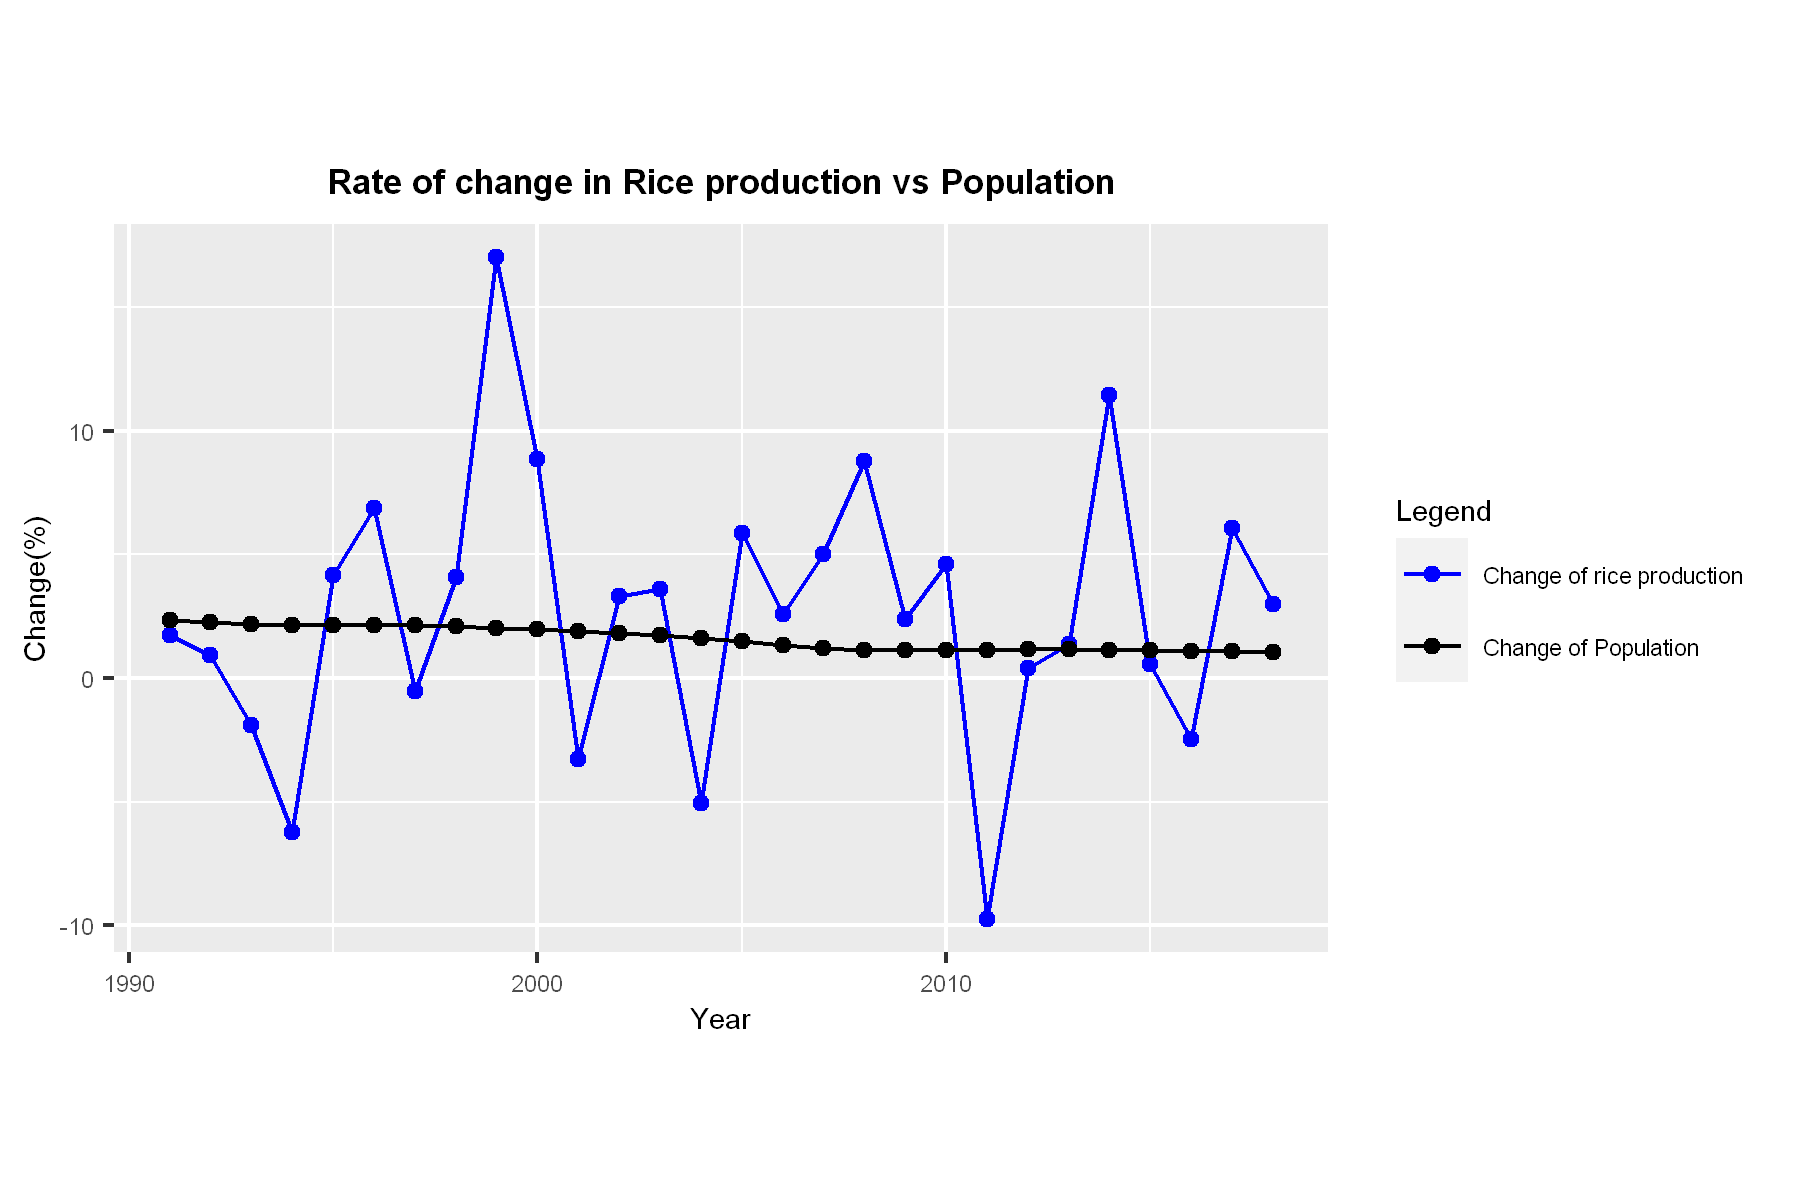

In [80]:
color <- c('Change of rice production'= 'blue', 'Change of Population'= 'black')
plt <- ggplot(df2,aes(x= Year)) +geom_point(aes(y = chng_rice,color = 'Change of rice production'))+ 
                                  geom_line(aes(y = chng_rice,color = 'Change of rice production'))+
                                  geom_line(aes(y = chng_pop,,color = 'Change of Population' ))+
                                  geom_point(aes(y = chng_pop,,color = 'Change of Population'))+
                                  labs(x= 'Year',y = 'Change(%)',color = 'Legend')+
                                  scale_color_manual(values = color) + ggtitle('Rate of change in Rice production vs Population')+
                                  theme(text = element_text(size = 7), plot.title = element_text(hjust = 0.5,,face = 'bold'),
                                       aspect.ratio = .6)
                                
plt

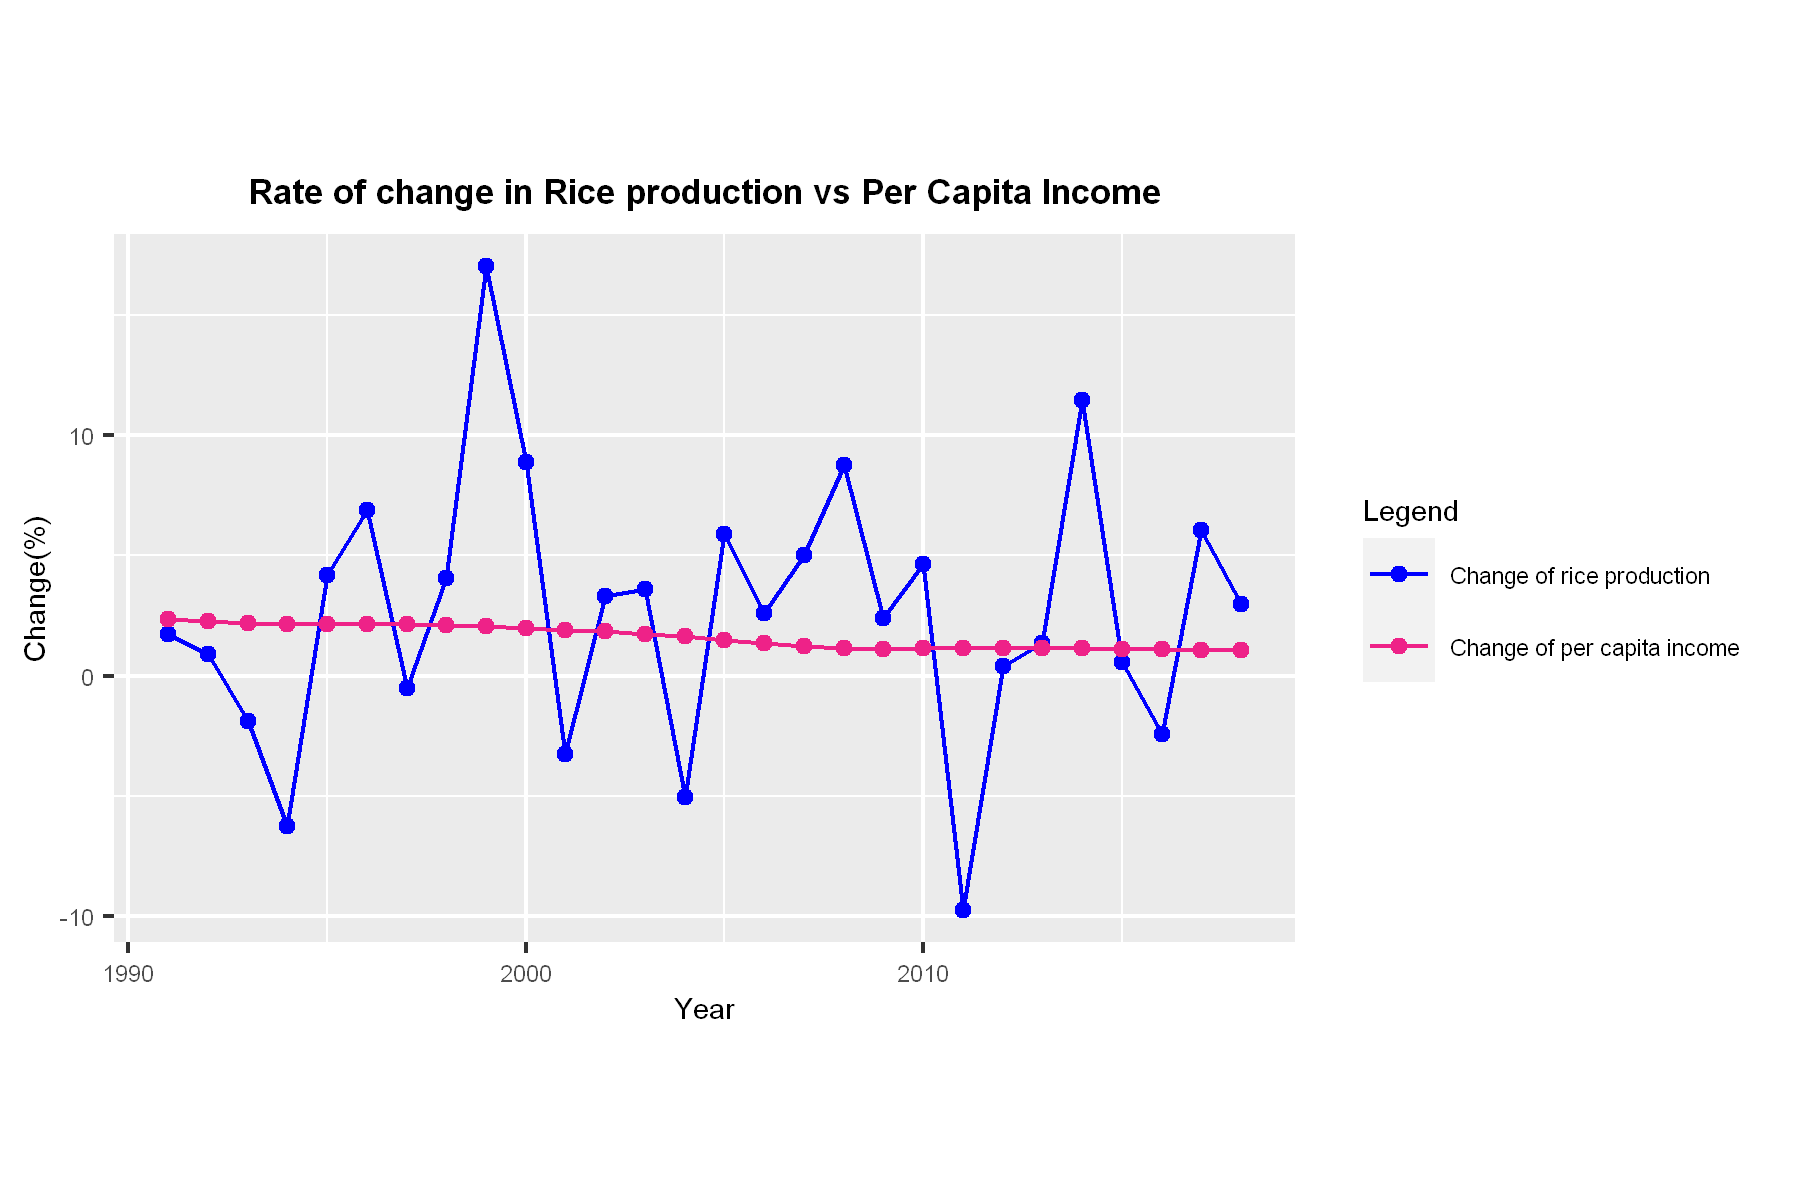

In [81]:
color <- c('Change of rice production'= 'blue', 'Change of per capita income'= "#EE2288")
plt <- ggplot(df2,aes(x= Year)) +geom_point(aes(y = chng_rice,color = 'Change of rice production'))+ 
                                  geom_line(aes(y = chng_rice,color = 'Change of rice production'))+
                                  geom_line(aes(y = chng_pop,,color = 'Change of per capita income' ))+
                                  geom_point(aes(y = chng_pop,,color = 'Change of per capita income'))+
                                  labs(x= 'Year',y = 'Change(%)',color = 'Legend')+
                                  scale_color_manual(values = color) + ggtitle('Rate of change in Rice production vs Per Capita Income')+
                                  theme(text = element_text(size = 7), plot.title = element_text(hjust = 0.5,,face = 'bold'),
                                       aspect.ratio = .6)
                                
plt

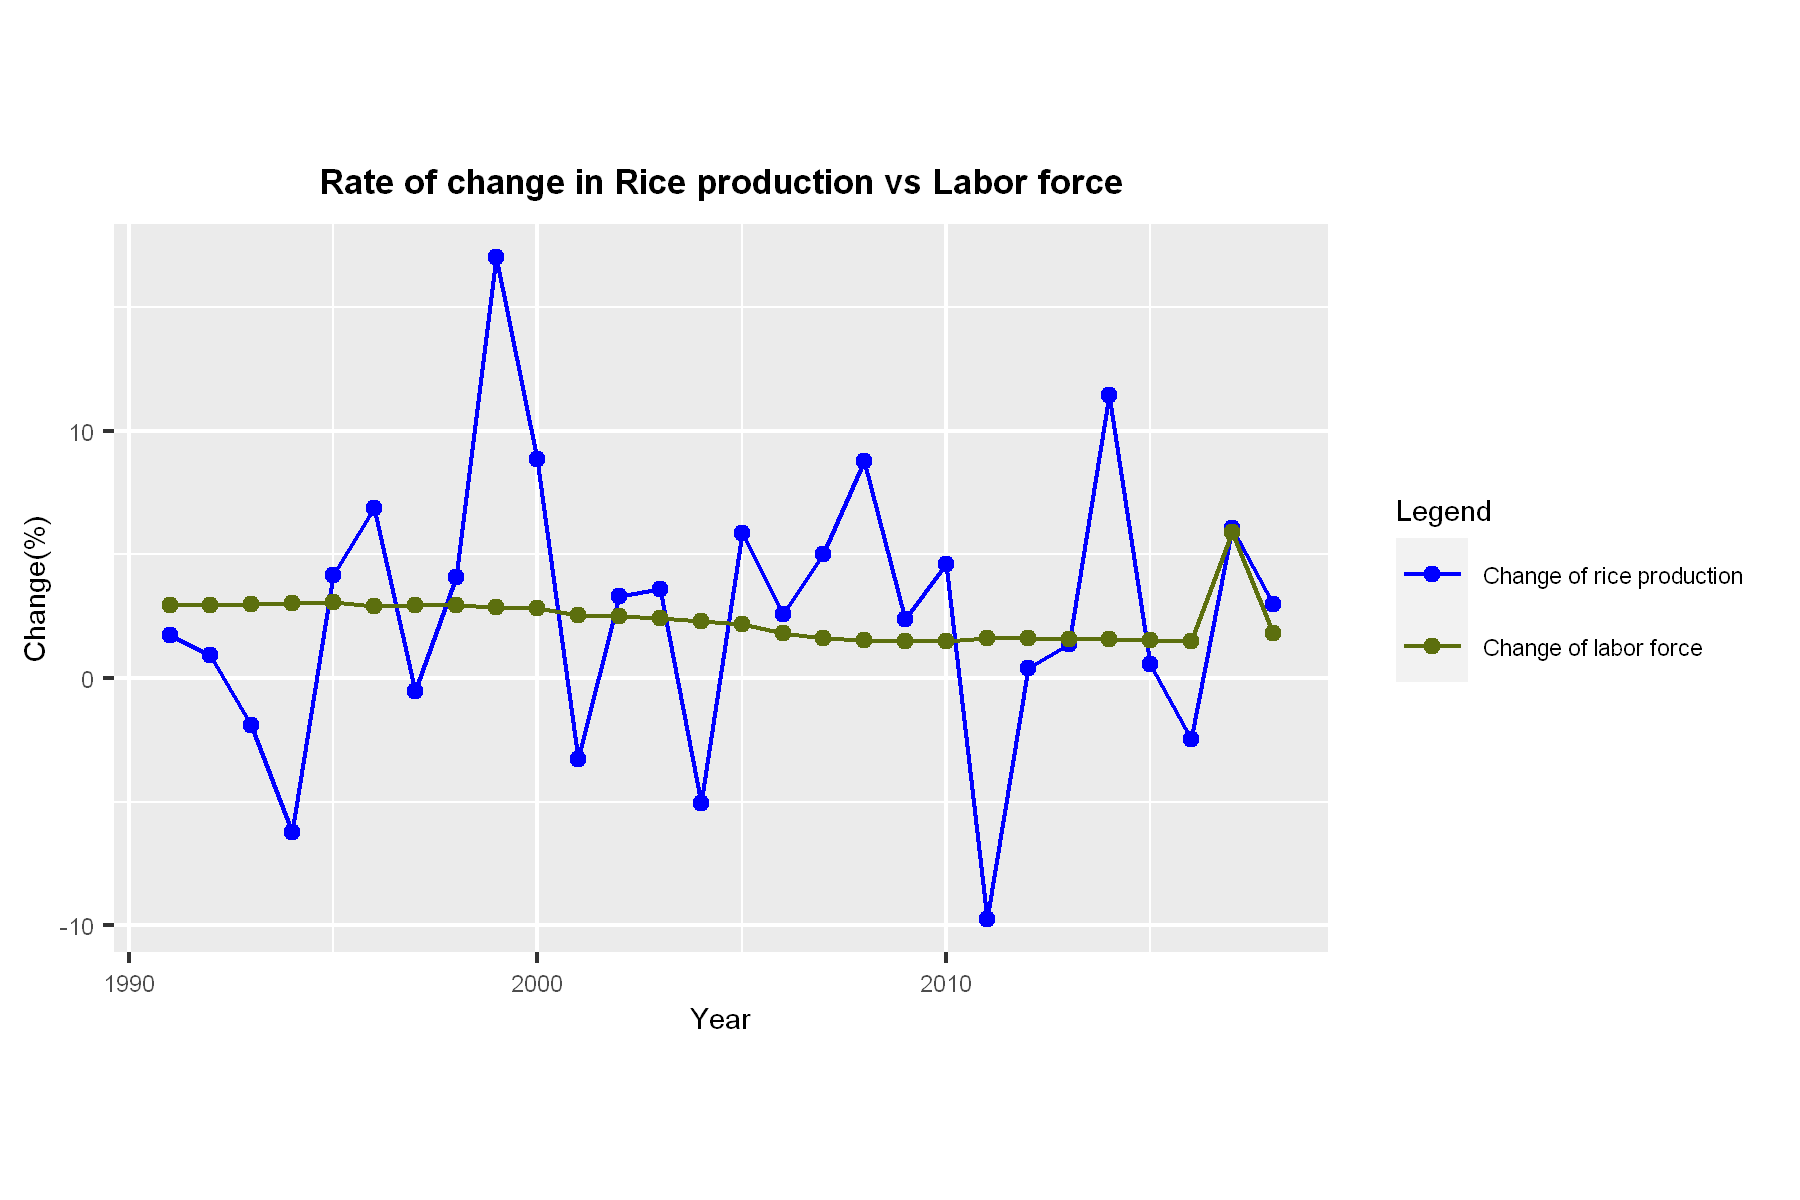

In [83]:
color <- c('Change of rice production'= 'blue', 'Change of labor force'= "#5C6F0E")
plt <- ggplot(df2,aes(x= Year)) +geom_point(aes(y = chng_rice,color = 'Change of rice production'))+ 
                                  geom_line(aes(y = chng_rice,color = 'Change of rice production'))+
                                  geom_line(aes(y = chng_labor,,color = 'Change of labor force' ))+
                                  geom_point(aes(y = chng_labor,,color = 'Change of labor force'))+
                                  labs(x= 'Year',y = 'Change(%)',color = 'Legend')+
                                  scale_color_manual(values = color) + ggtitle('Rate of change in Rice production vs Labor force')+
                                  theme(text = element_text(size = 7), plot.title = element_text(hjust = 0.5,,face = 'bold'),
                                       aspect.ratio = .6)
                                
plt

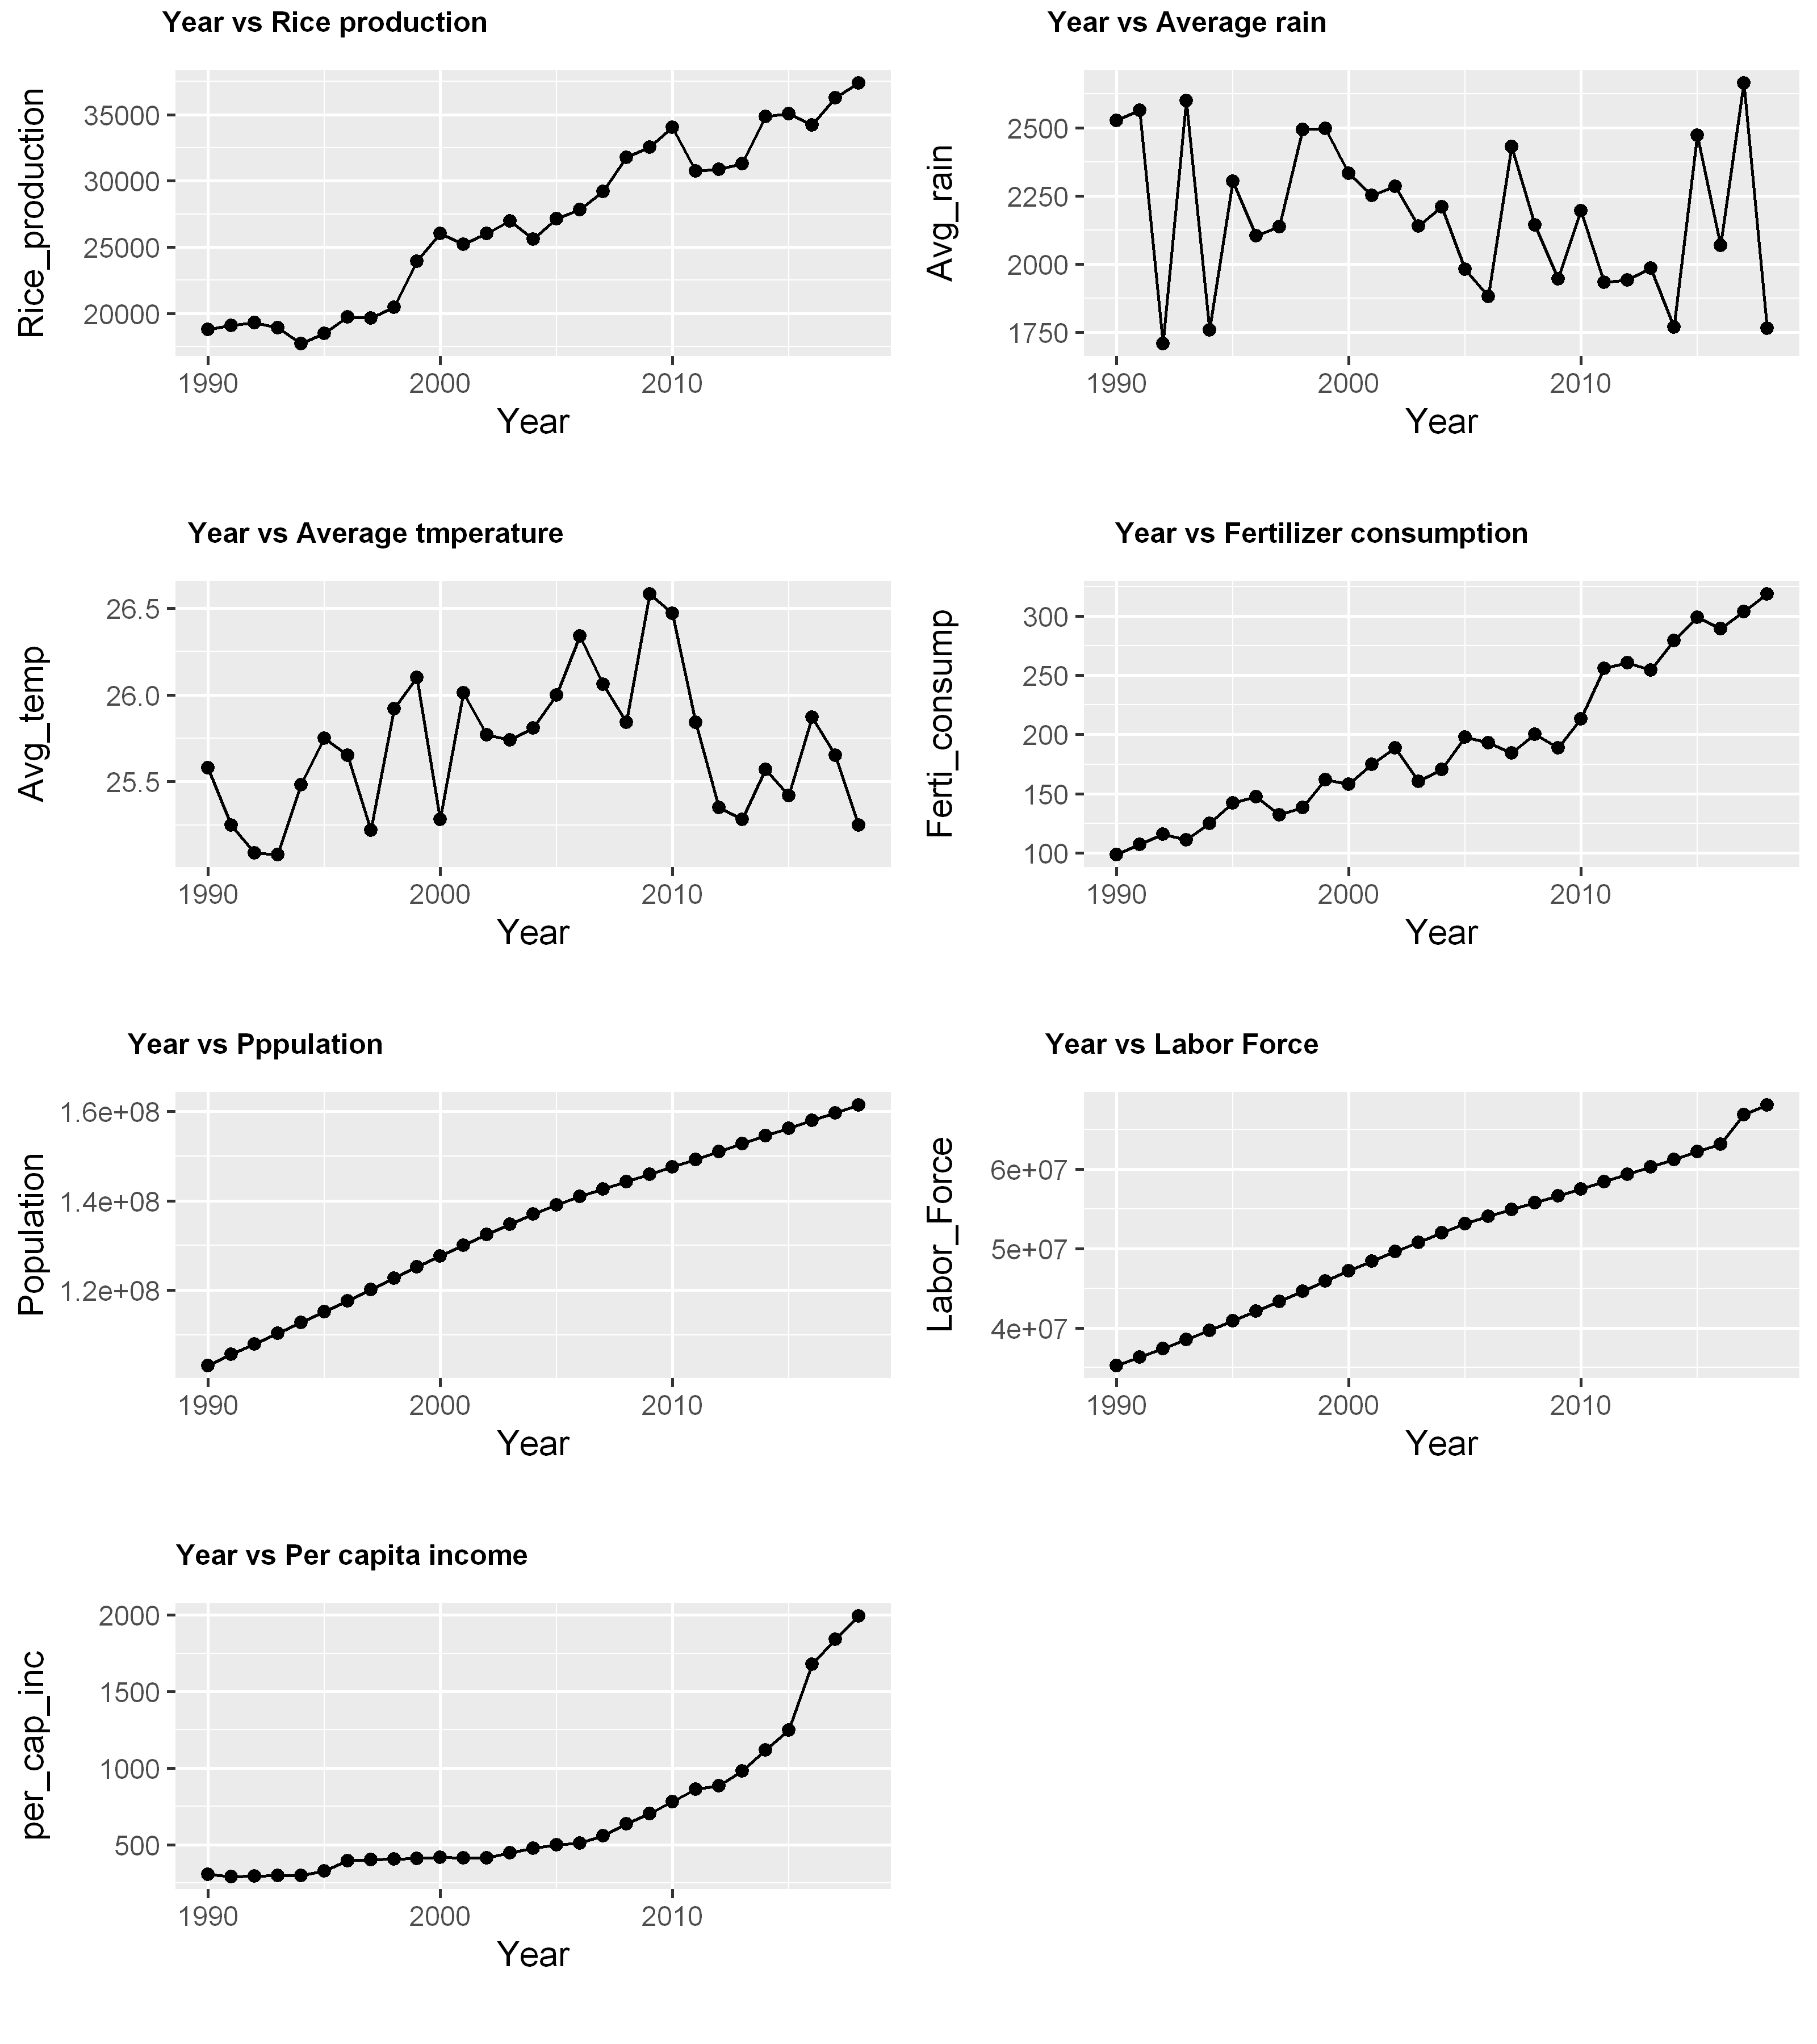

In [144]:
options(repr.plot.width = 8, repr.plot.height = 9,repr.plot.res = 400)
p <- ggplot(data = df, aes(x = Year, y= Avg_rain)) + geom_line()+geom_point()+ theme(aspect.ratio = .4,
                                                                                     plot.title = element_text(hjust = 0.5))
q <- ggplot(data = df, aes(x = Year, y= Avg_temp)) + geom_line()+geom_point()+ theme(aspect.ratio = .4)
r <- ggplot(data = df, aes(x = Year, y= Population)) + geom_line()+geom_point()+ theme(aspect.ratio = .4)
s <- ggplot(data = df, aes(x = Year, y= Ferti_consump)) + geom_line()+geom_point()+ theme(aspect.ratio = .4)
t <- ggplot(data = df, aes(x = Year, y= Rice_production)) + geom_line()+geom_point()+ theme(aspect.ratio = .4)
u <- ggplot(data = df, aes(x = Year, y= Labor_Force)) + geom_line()+geom_point()+ theme(aspect.ratio = .4)
v <- ggplot(data = df, aes(x = Year, y= per_cap_inc)) + geom_line()+geom_point()+ theme(aspect.ratio = .4)
                                                                                                    
plot_grid(t,p,q,s,r,u,v,labels=c('Year vs Rice production','Year vs Average rain',
                            'Year vs Average tmperature','Year vs Fertilizer consumption',
                            'Year vs Pppulation','Year vs Labor Force','Year vs Per capita income'),
          ncol = 2, nrow = 4, label_size = 9, align = 'v')

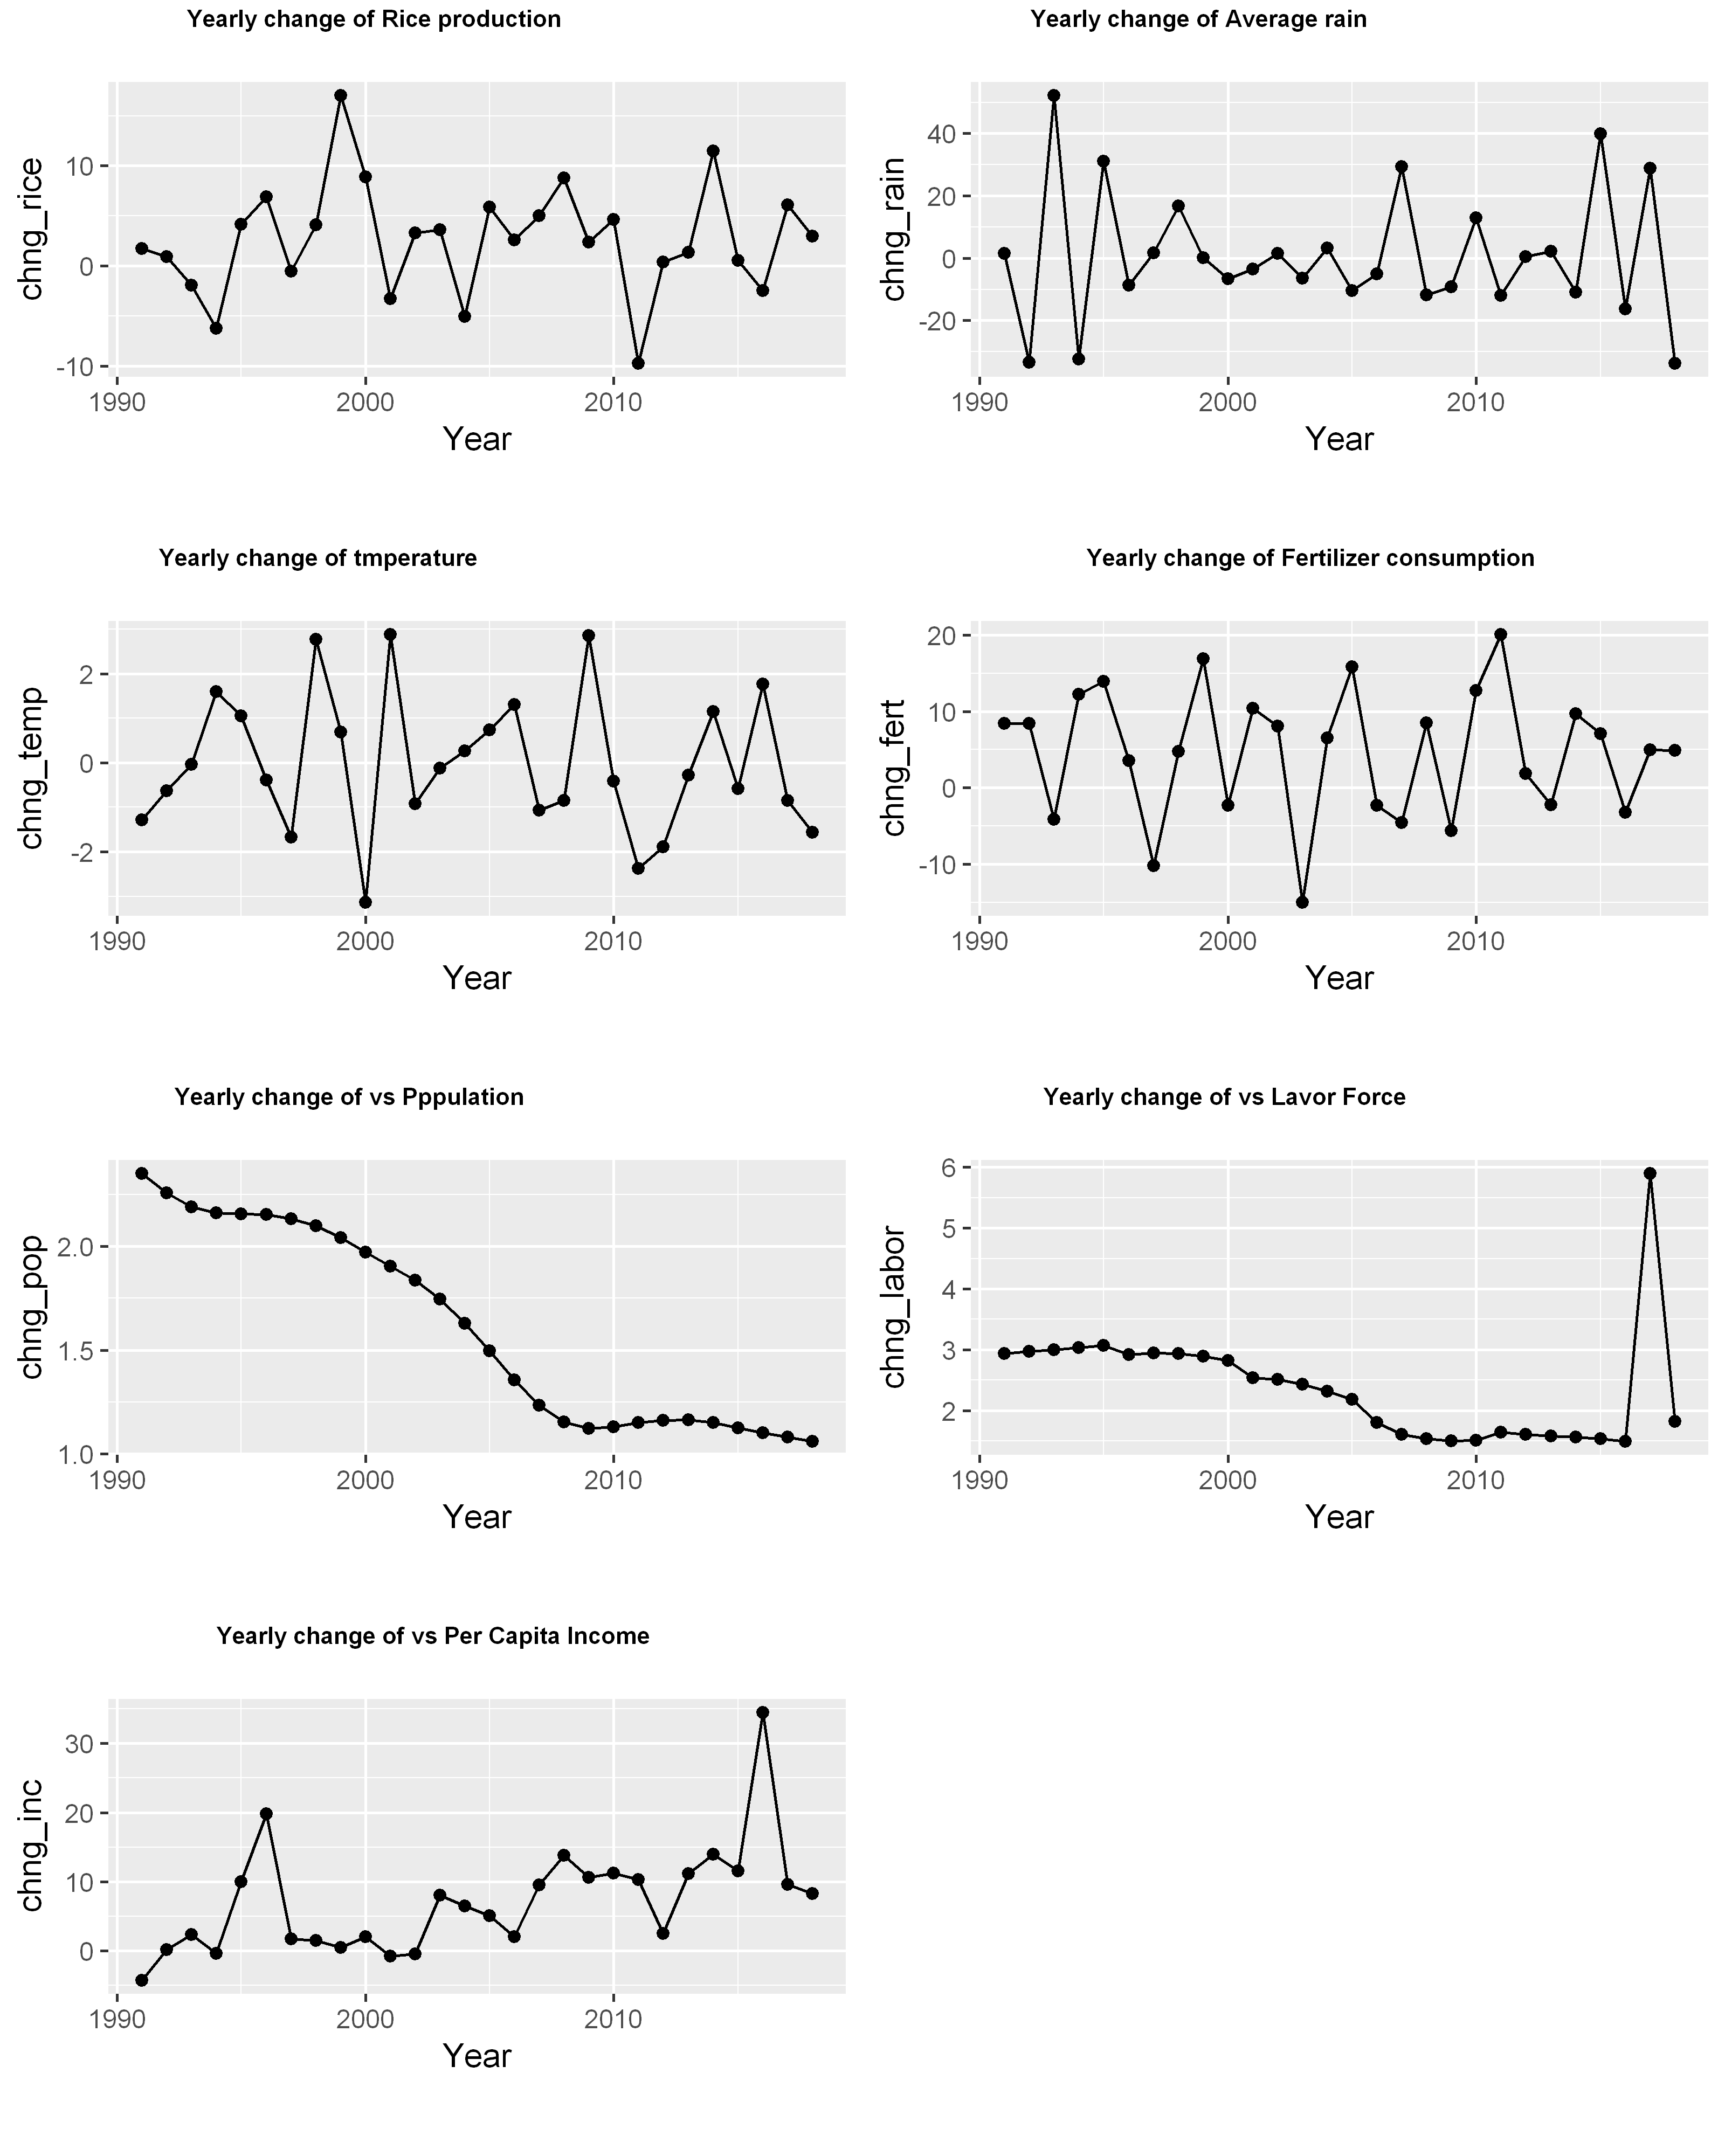

In [139]:
options(repr.plot.width = 8, repr.plot.height = 10,repr.plot.res = 400)
p <- ggplot(data = df2, aes(x = Year, y= chng_rain)) + geom_line()+geom_point()+ theme(aspect.ratio = .4,
                                                                                       plot.title = element_text(hjust = 0.5))
q <- ggplot(data = df2, aes(x = Year, y= chng_temp)) + geom_line()+geom_point()+ theme(aspect.ratio = .4)
r <- ggplot(data = df2, aes(x = Year, y= chng_pop)) + geom_line()+geom_point()+ theme(aspect.ratio = .4)
s <- ggplot(data = df2, aes(x = Year, y= chng_fert)) + geom_line()+geom_point()+ theme(aspect.ratio = .4)
t <- ggplot(data = df2, aes(x = Year, y= chng_rice)) + geom_line()+geom_point()+ theme(aspect.ratio = .4,
                                                                                       plot.title = element_text(hjust = 0.5))
u <- ggplot(data = df2, aes(x = Year, y= chng_labor)) + geom_line()+geom_point()+ theme(aspect.ratio = .4)
v <- ggplot(data = df2, aes(x = Year, y= chng_inc)) + geom_line()+geom_point()+ theme(aspect.ratio = .4)
                                                                                                    
plot_grid(t,p,q,s,r,u,v,labels=c('Yearly change of Rice production','Yearly change of Average rain',
                            'Yearly change of tmperature','Yearly change of Fertilizer consumption',
                            'Yearly change of vs Pppulation','Yearly change of vs Lavor Force','Yearly change of vs Per Capita Income'), ncol = 2, nrow = 4,label_size = 8,align = 'hv')

`geom_smooth()` using formula 'y ~ x'

Warning message:
"Computation failed in `stat_smooth()`:
'what' must be a function or character string"


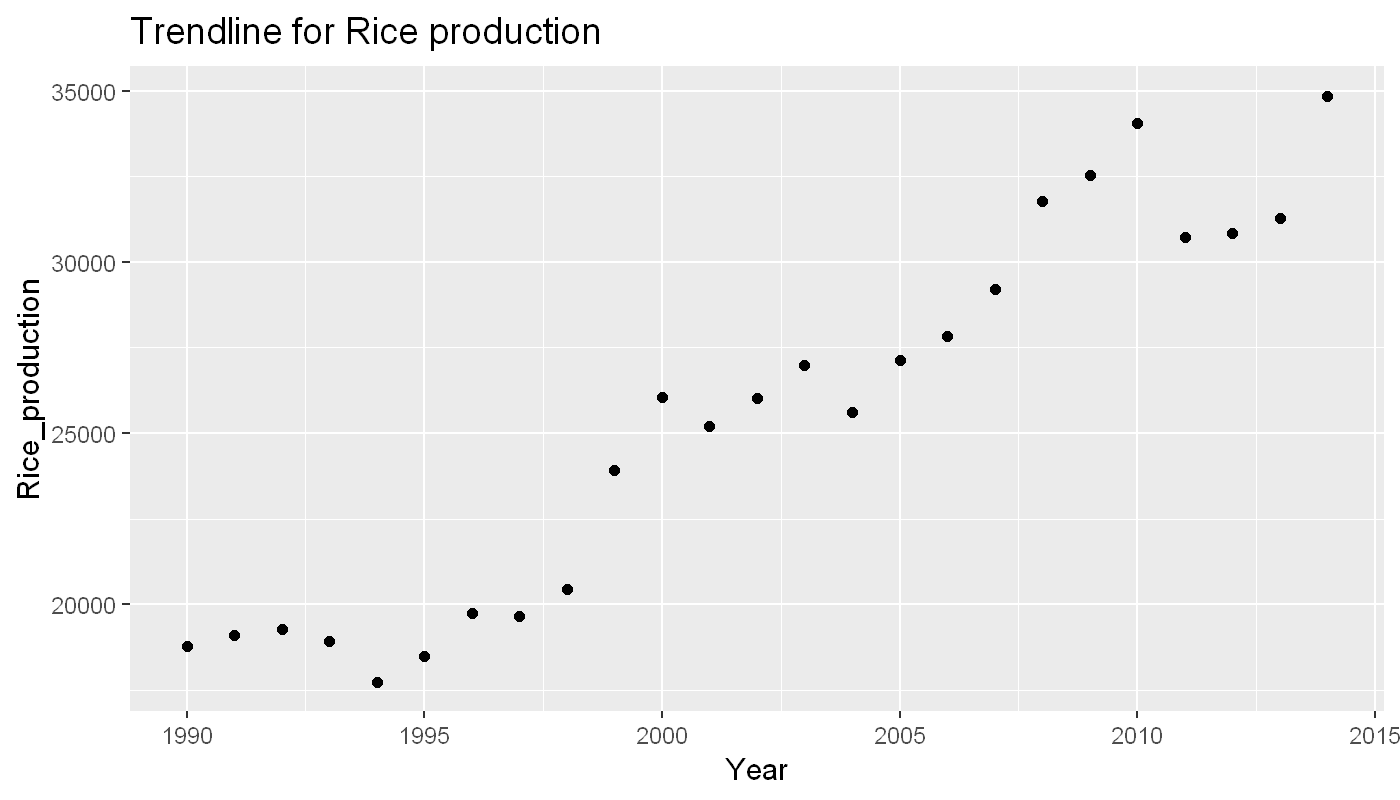

In [55]:
options(repr.plot.width = 7, repr.plot.height = 4,repr.plot.res = 200)
ggplot(data = train, aes(x =Year, y = Rice_production)) + geom_point() + geom_smooth(method = md)+ 
ggtitle('Trendline for Rice production')

In [155]:
# Created table for ADF test for stationarity for each column in df dataset
d <-character()
l <-character()
p <-character()
n <-character()
nam <- names(df)
for(i in 2:ncol(df)){
    gh <- adf.test(df[,i], k = 1)
    d <- c(d,gh$statistic)
    l <- c(l,gh$parameter)
    p <- c(p,gh$p.value)
    n <- c(n,nam[i])
}
dft <- data.frame(Name = n,Adf_statistic = d, Lag_order = l, P_value= p )
dft

Warning message in adf.test(df[, i], k = 1):
"p-value greater than printed p-value"


Name,Adf_statistic,Lag_order,P_value
<fct>,<fct>,<fct>,<fct>
Rice_production,-3.47166887535799,1,0.0663754398426257
Population,-4.03276799021431,1,0.0214045674281288
Labor_Force,-1.79963036065061,1,0.649422901801567
Ferti_consump,-2.13864833909912,1,0.519456262565031
Avg_temp,-2.43193034966322,1,0.407023059358551
Avg_rain,-3.47498888709625,1,0.0659080958479385
per_cap_inc,1.46392225139423,1,0.99


In [161]:
# Johansen cointegration test for checking cointegration among the columns
# We see that for r <= 3 we failed to rejct the null hypothesis.
# Which means ther are conintegration at least in 3 factors
jot <- ca.jo(df[-c(1)],type="trace", K=2, ecdet="none", spec="longrun")
summary(jot)

Warning message in chol.default(SKK, pivot = TRUE):
"the matrix is either rank-deficient or indefinite"
Warning message in log(1 - lambda[(x + 1):P]):
"NaNs produced"



###################### 
# Johansen-Procedure # 
###################### 

Test type: trace statistic , with linear trend 

Eigenvalues (lambda):
[1] 20.12773309  0.93175544  0.80018007  0.54195957  0.50284175  0.40516256
[7]  0.04584668

Values of teststatistic and critical values of test:

           test  10pct   5pct   1pct
r <= 6 |   1.27   6.50   8.18  11.65
r <= 5 |  15.29  15.66  17.95  23.52
r <= 4 |  34.16  28.71  31.52  37.22
r <= 3 |  55.24  45.23  48.28  55.43
r <= 2 |  98.72  66.49  70.60  78.87
r <= 1 | 171.21  85.18  90.39 104.20
r = 0  |    NaN 118.99 124.25 136.06

Eigenvectors, normalised to first column:
(These are the cointegration relations)

                   Rice_production.l2 Population.l2 Labor_Force.l2
Rice_production.l2       1.000000e+00  1.000000e+00   1.000000e+00
Population.l2            1.212757e-02  1.654815e-02  -6.923286e-03
Labor_Force.l2          -2.334057e-02 -3.509854e-02   1.503997e-02
Ferti_consump.l2        -6.722238e+01  8.315368e+01  -2.9597

In [8]:
# Splitting the dataset 
train <- df[c(1:25),]
test <- df[c(26:29),]

In [9]:
# Regression model
md <- lm(Rice_production ~ Population + Ferti_consump + per_cap_inc , data = train )
summary(md)


Call:
lm(formula = Rice_production ~ Population + Ferti_consump + per_cap_inc, 
    data = train)

Residuals:
     Min       1Q   Median       3Q      Max 
-2830.87 -1133.78   -86.31  1311.50  2296.49 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)   -1.810e+04  4.958e+03  -3.651  0.00149 ** 
Population     3.592e-04  6.042e-05   5.945 6.69e-06 ***
Ferti_consump -4.246e+01  2.661e+01  -1.596  0.12543    
per_cap_inc    7.538e+00  4.084e+00   1.846  0.07903 .  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1603 on 21 degrees of freedom
Multiple R-squared:  0.9268,	Adjusted R-squared:  0.9163 
F-statistic: 88.59 on 3 and 21 DF,  p-value: 4.386e-12


In [40]:
pr <-predict(md,train)

In [41]:
train['Predicted'] <- pr

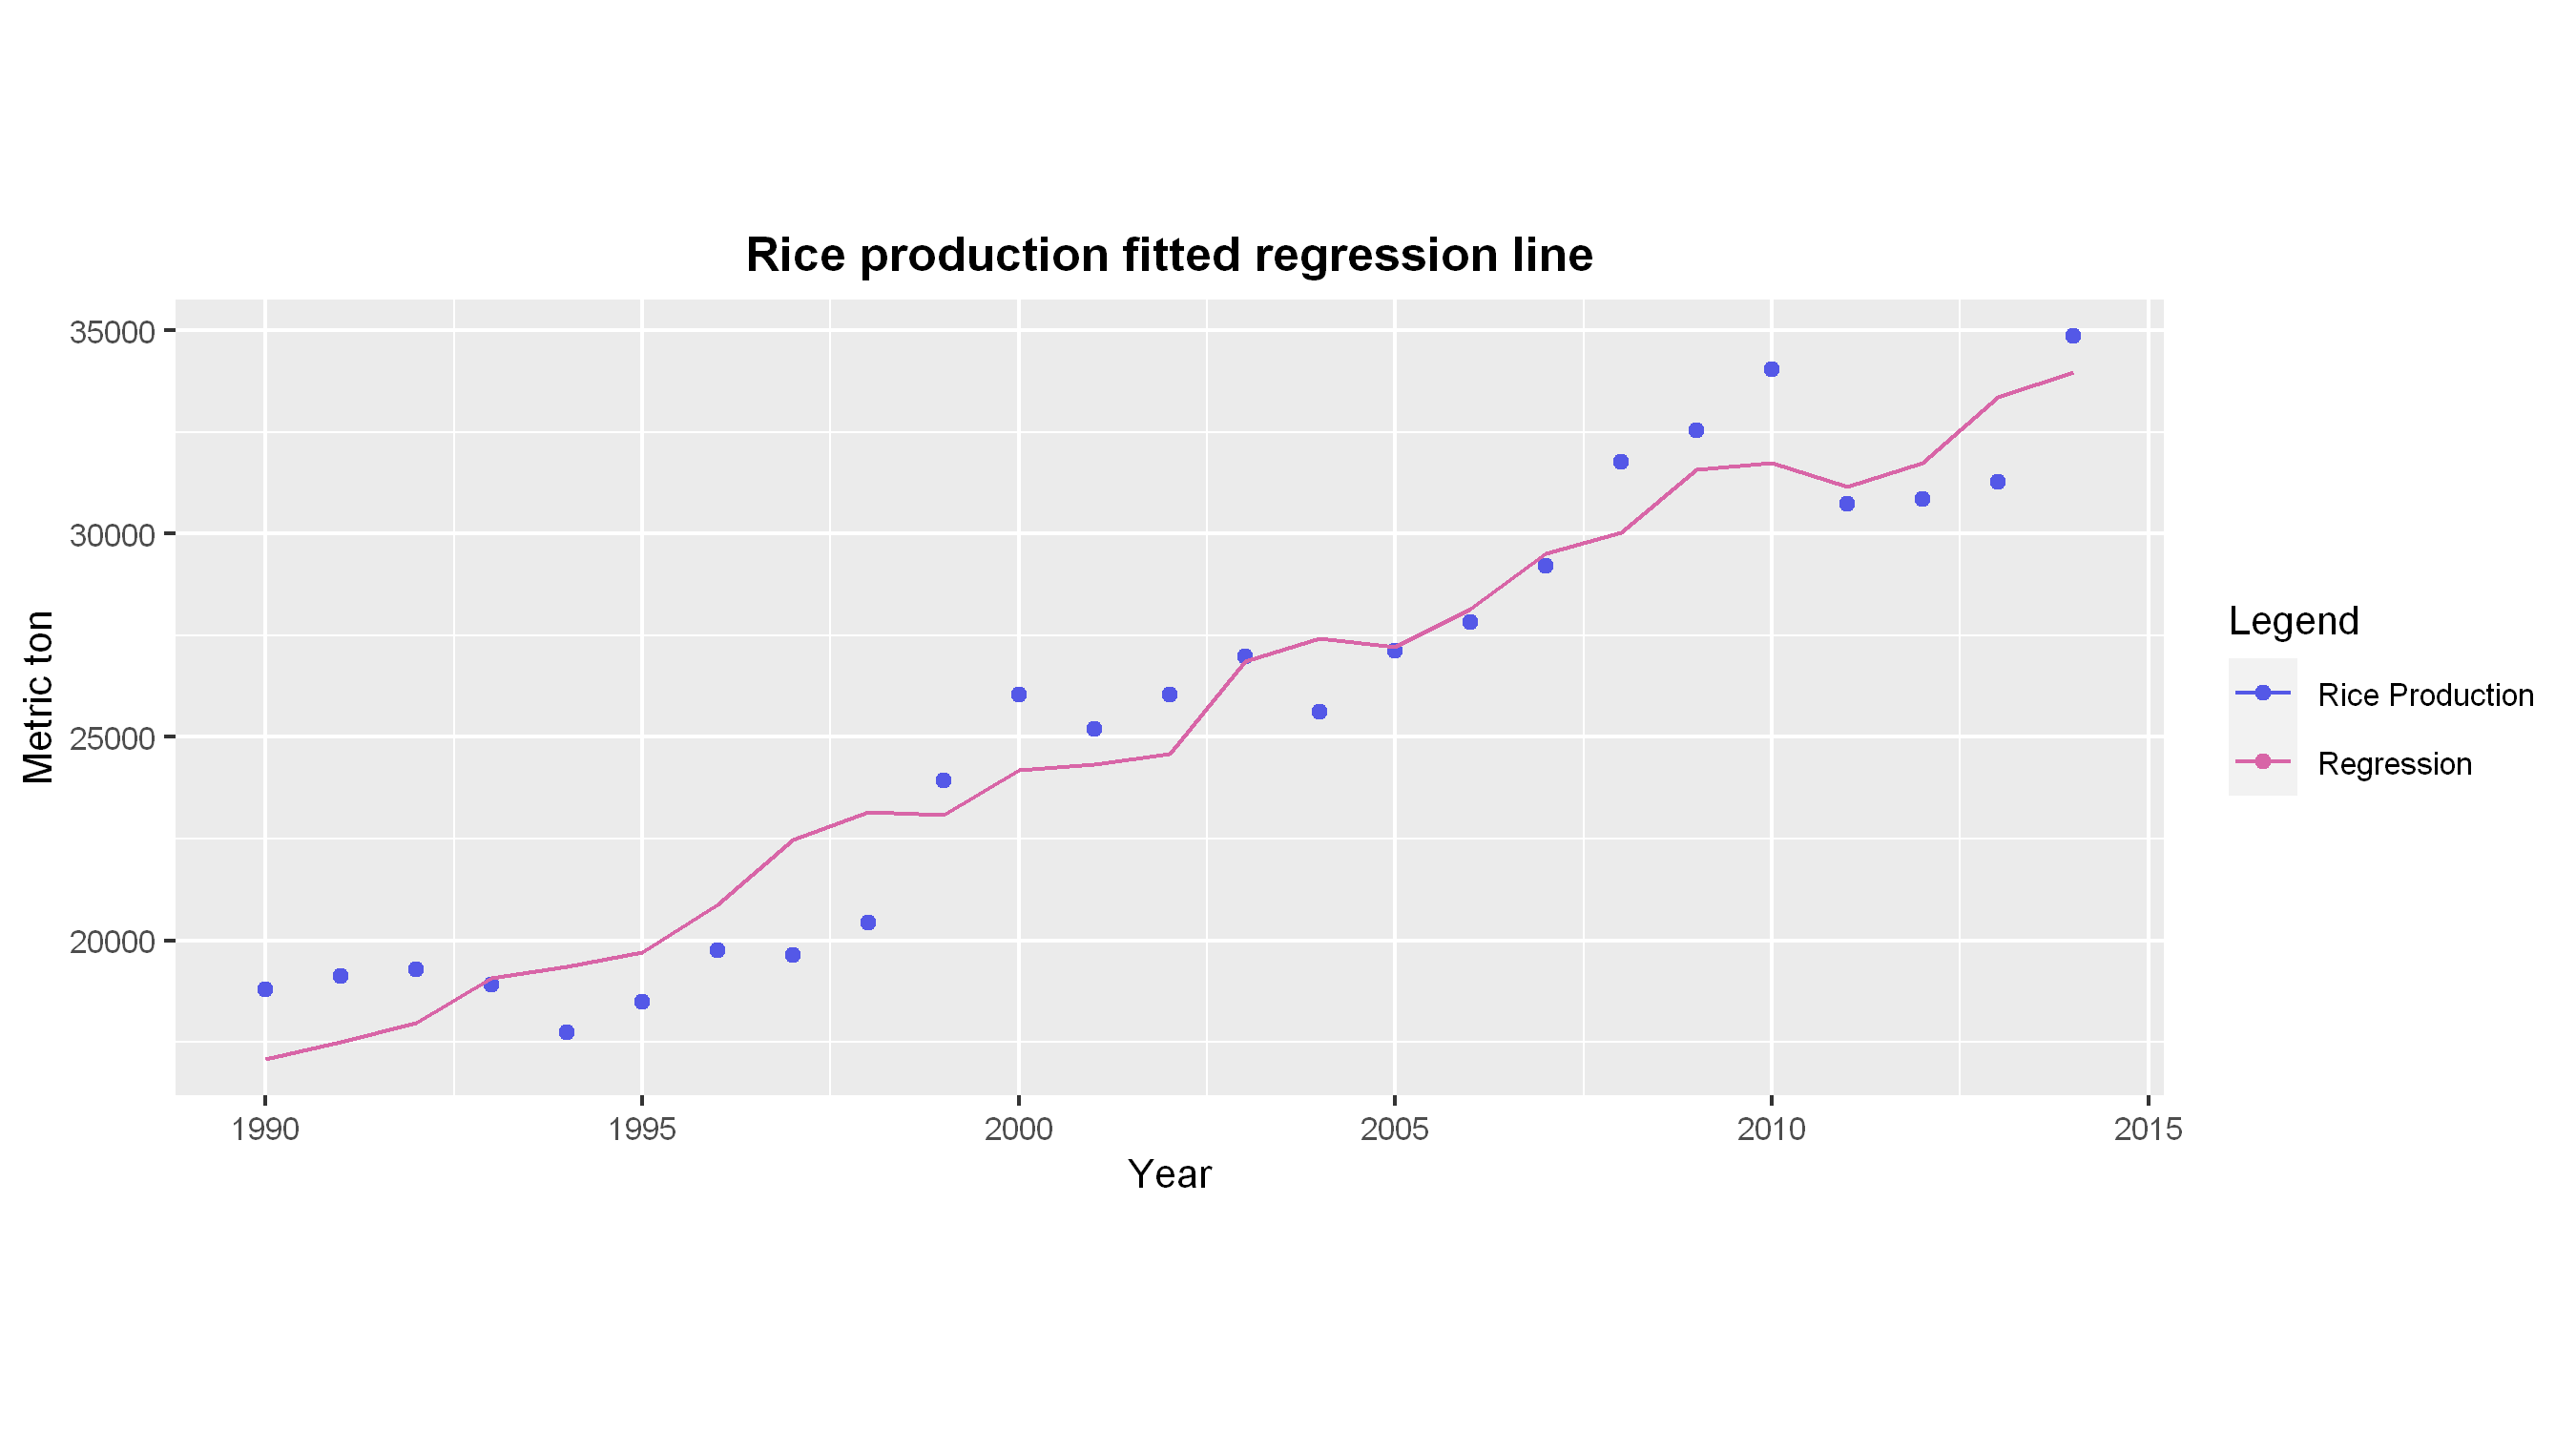

In [58]:
options(repr.plot.width = 9, repr.plot.height = 5,repr.plot.res = 300)
color <- c('Rice Production'= '#5458e7', 'Regression'= '#d865a7')
plt <- ggplot(train,aes(x= Year)) + geom_point(aes(y = Rice_production,color = 'Rice Production'))+
                                  geom_line(aes(y = Predicted,color = 'Regression' ))+
                                  labs(x= 'Year',y = 'Metric ton',color = 'Legend')+
                                  scale_color_manual(values = color) + ggtitle('Rice production fitted regression line')+
                                  theme(text = element_text(size = 10), plot.title = element_text(hjust = 0.5,,face = 'bold'),
                                       aspect.ratio = .4)
plt     

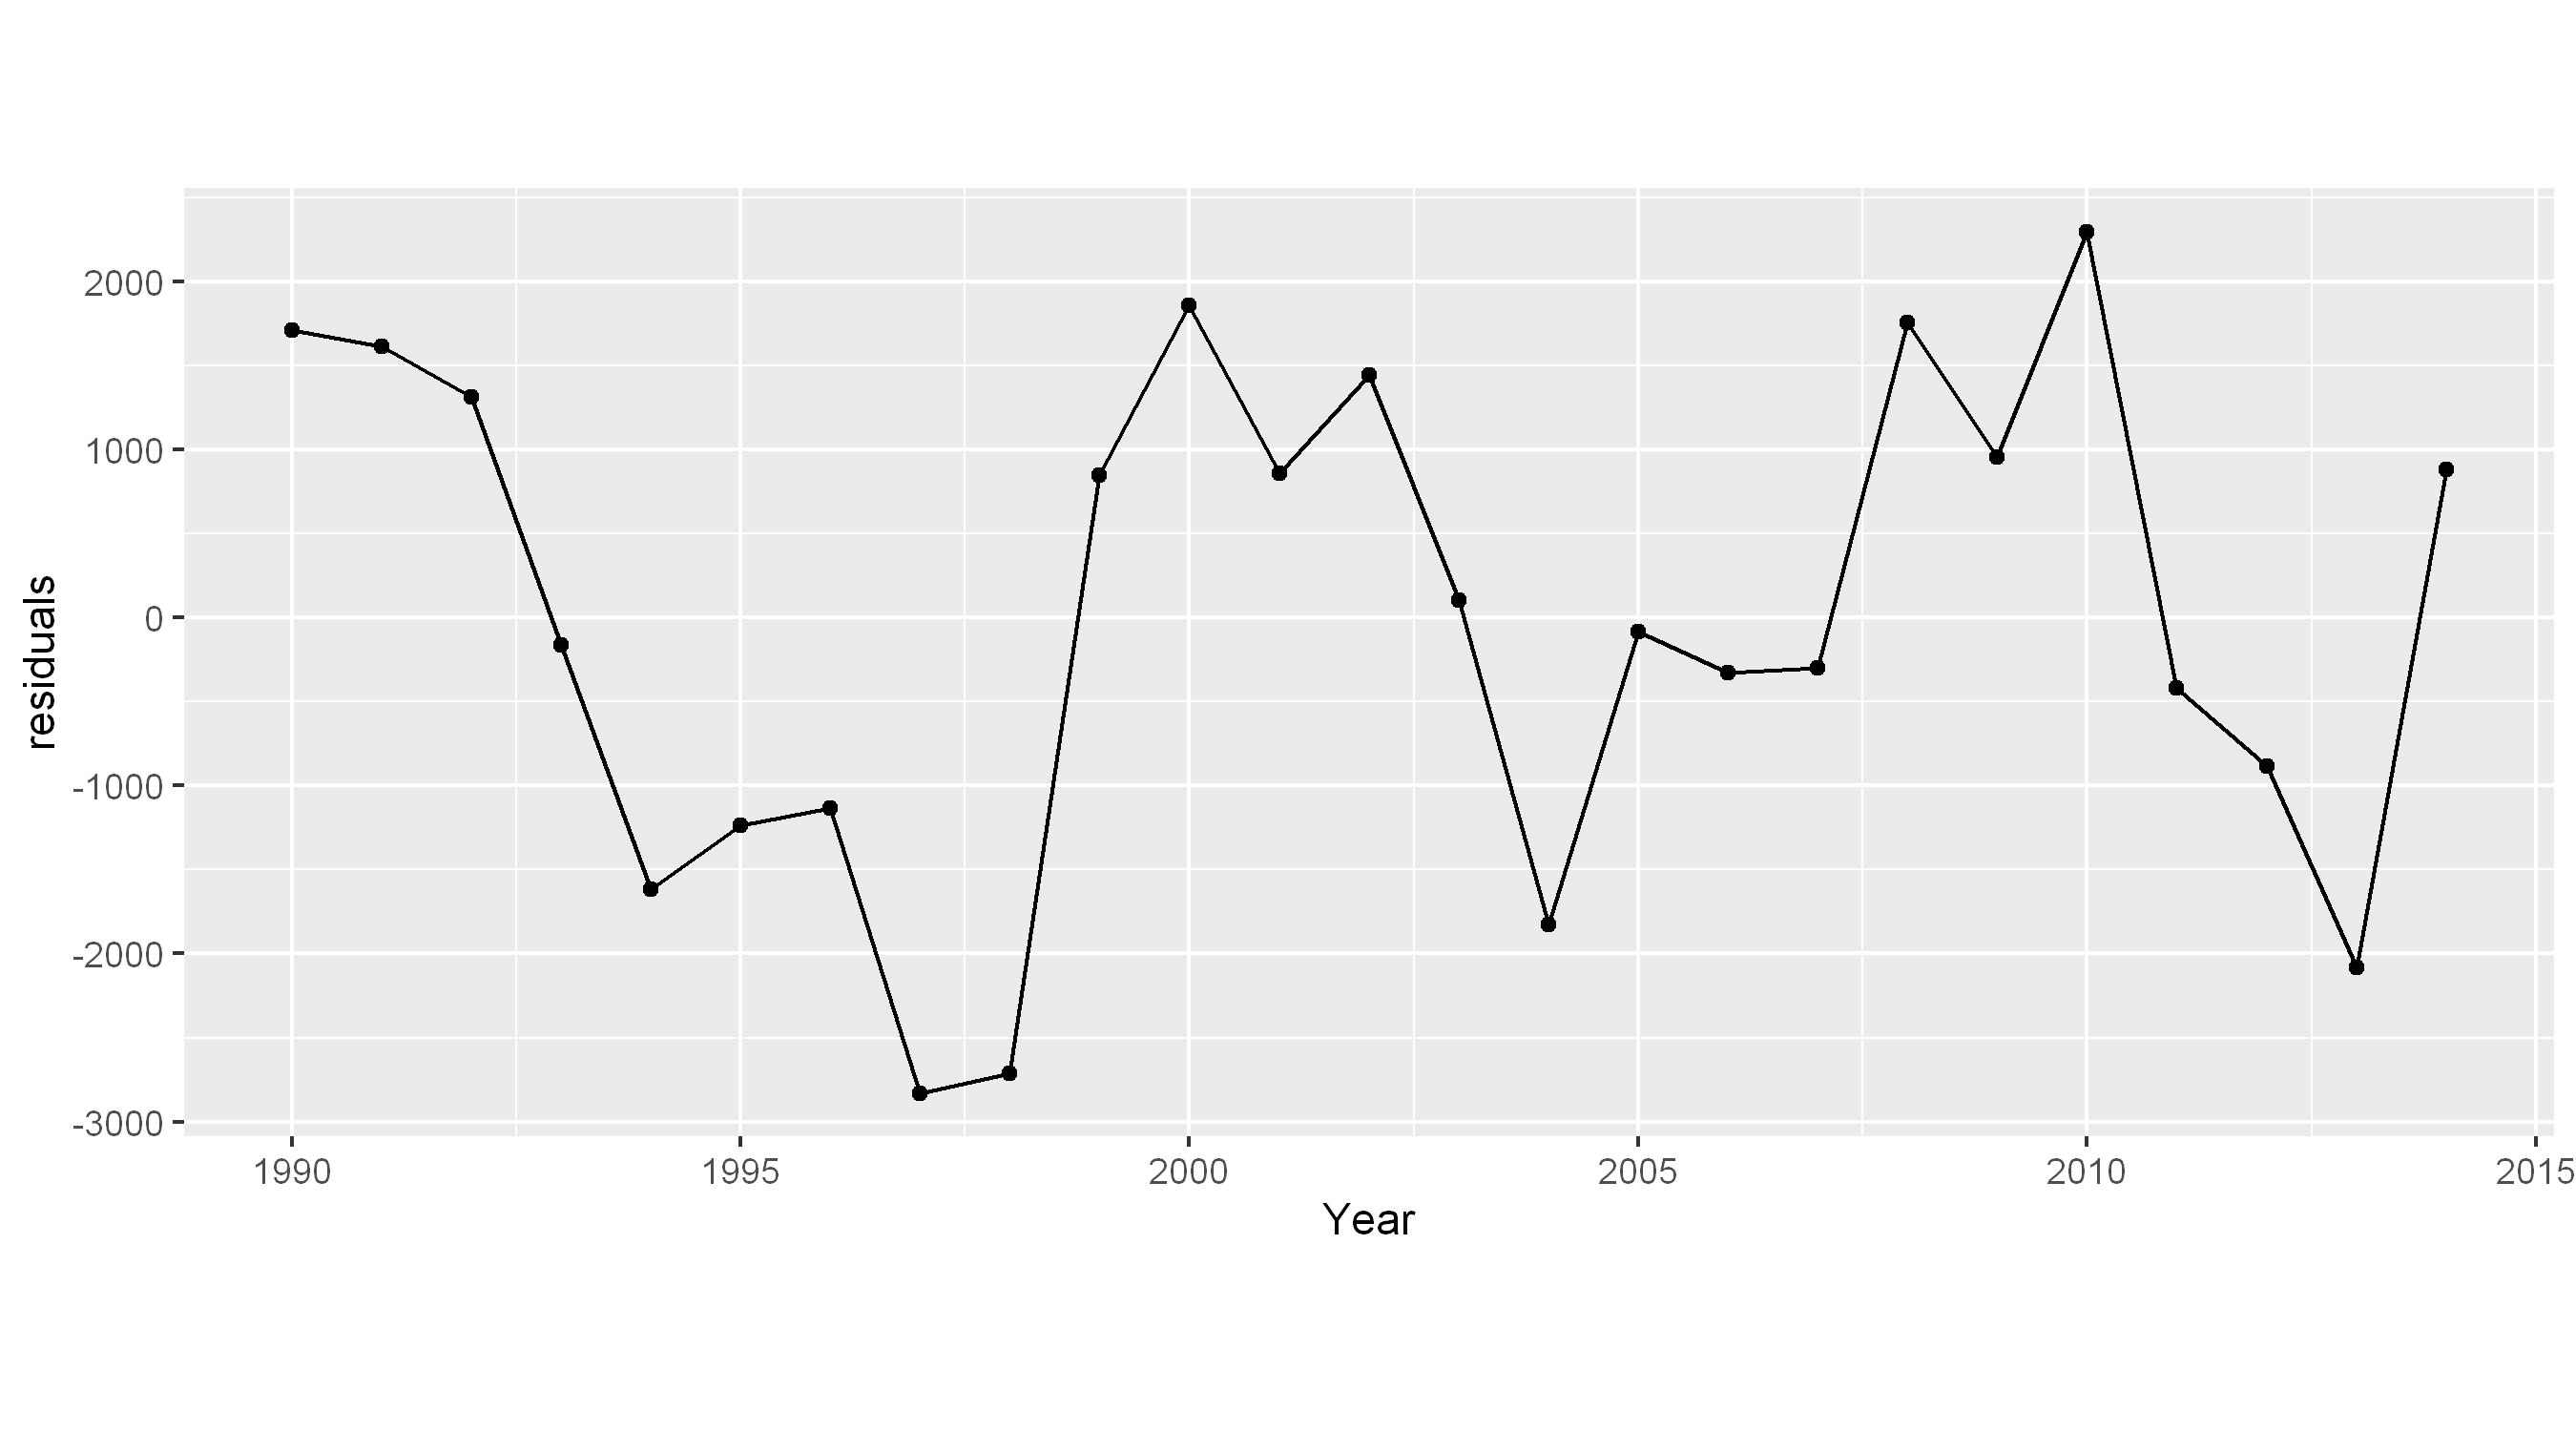

In [44]:
rd <- data.frame(Year = train$Year, residuals = md$residuals)
ggplot(data = rd, aes(x = Year, y = residuals))+geom_line()+geom_point()+theme(aspect.ratio = .4)

In [45]:
mean(md$residuals)

[1] 3.399503e-15

In [10]:
pr2 <- predict(md,test)

In [11]:
pr2

26       27       28       29 
34741.80 39011.35 40228.19 41354.29

In [12]:
test$Rice_production

[1] 35060.10 34201.50 36278.50 37363.72

In [13]:
conc <- data.frame(Year = c(2015,2016,2017,2018), Rice_production = test$Rice_production, 
                  reg_pred = pr2, arima_pred = c(35412.83,35964.47,36516.10,37067.73))

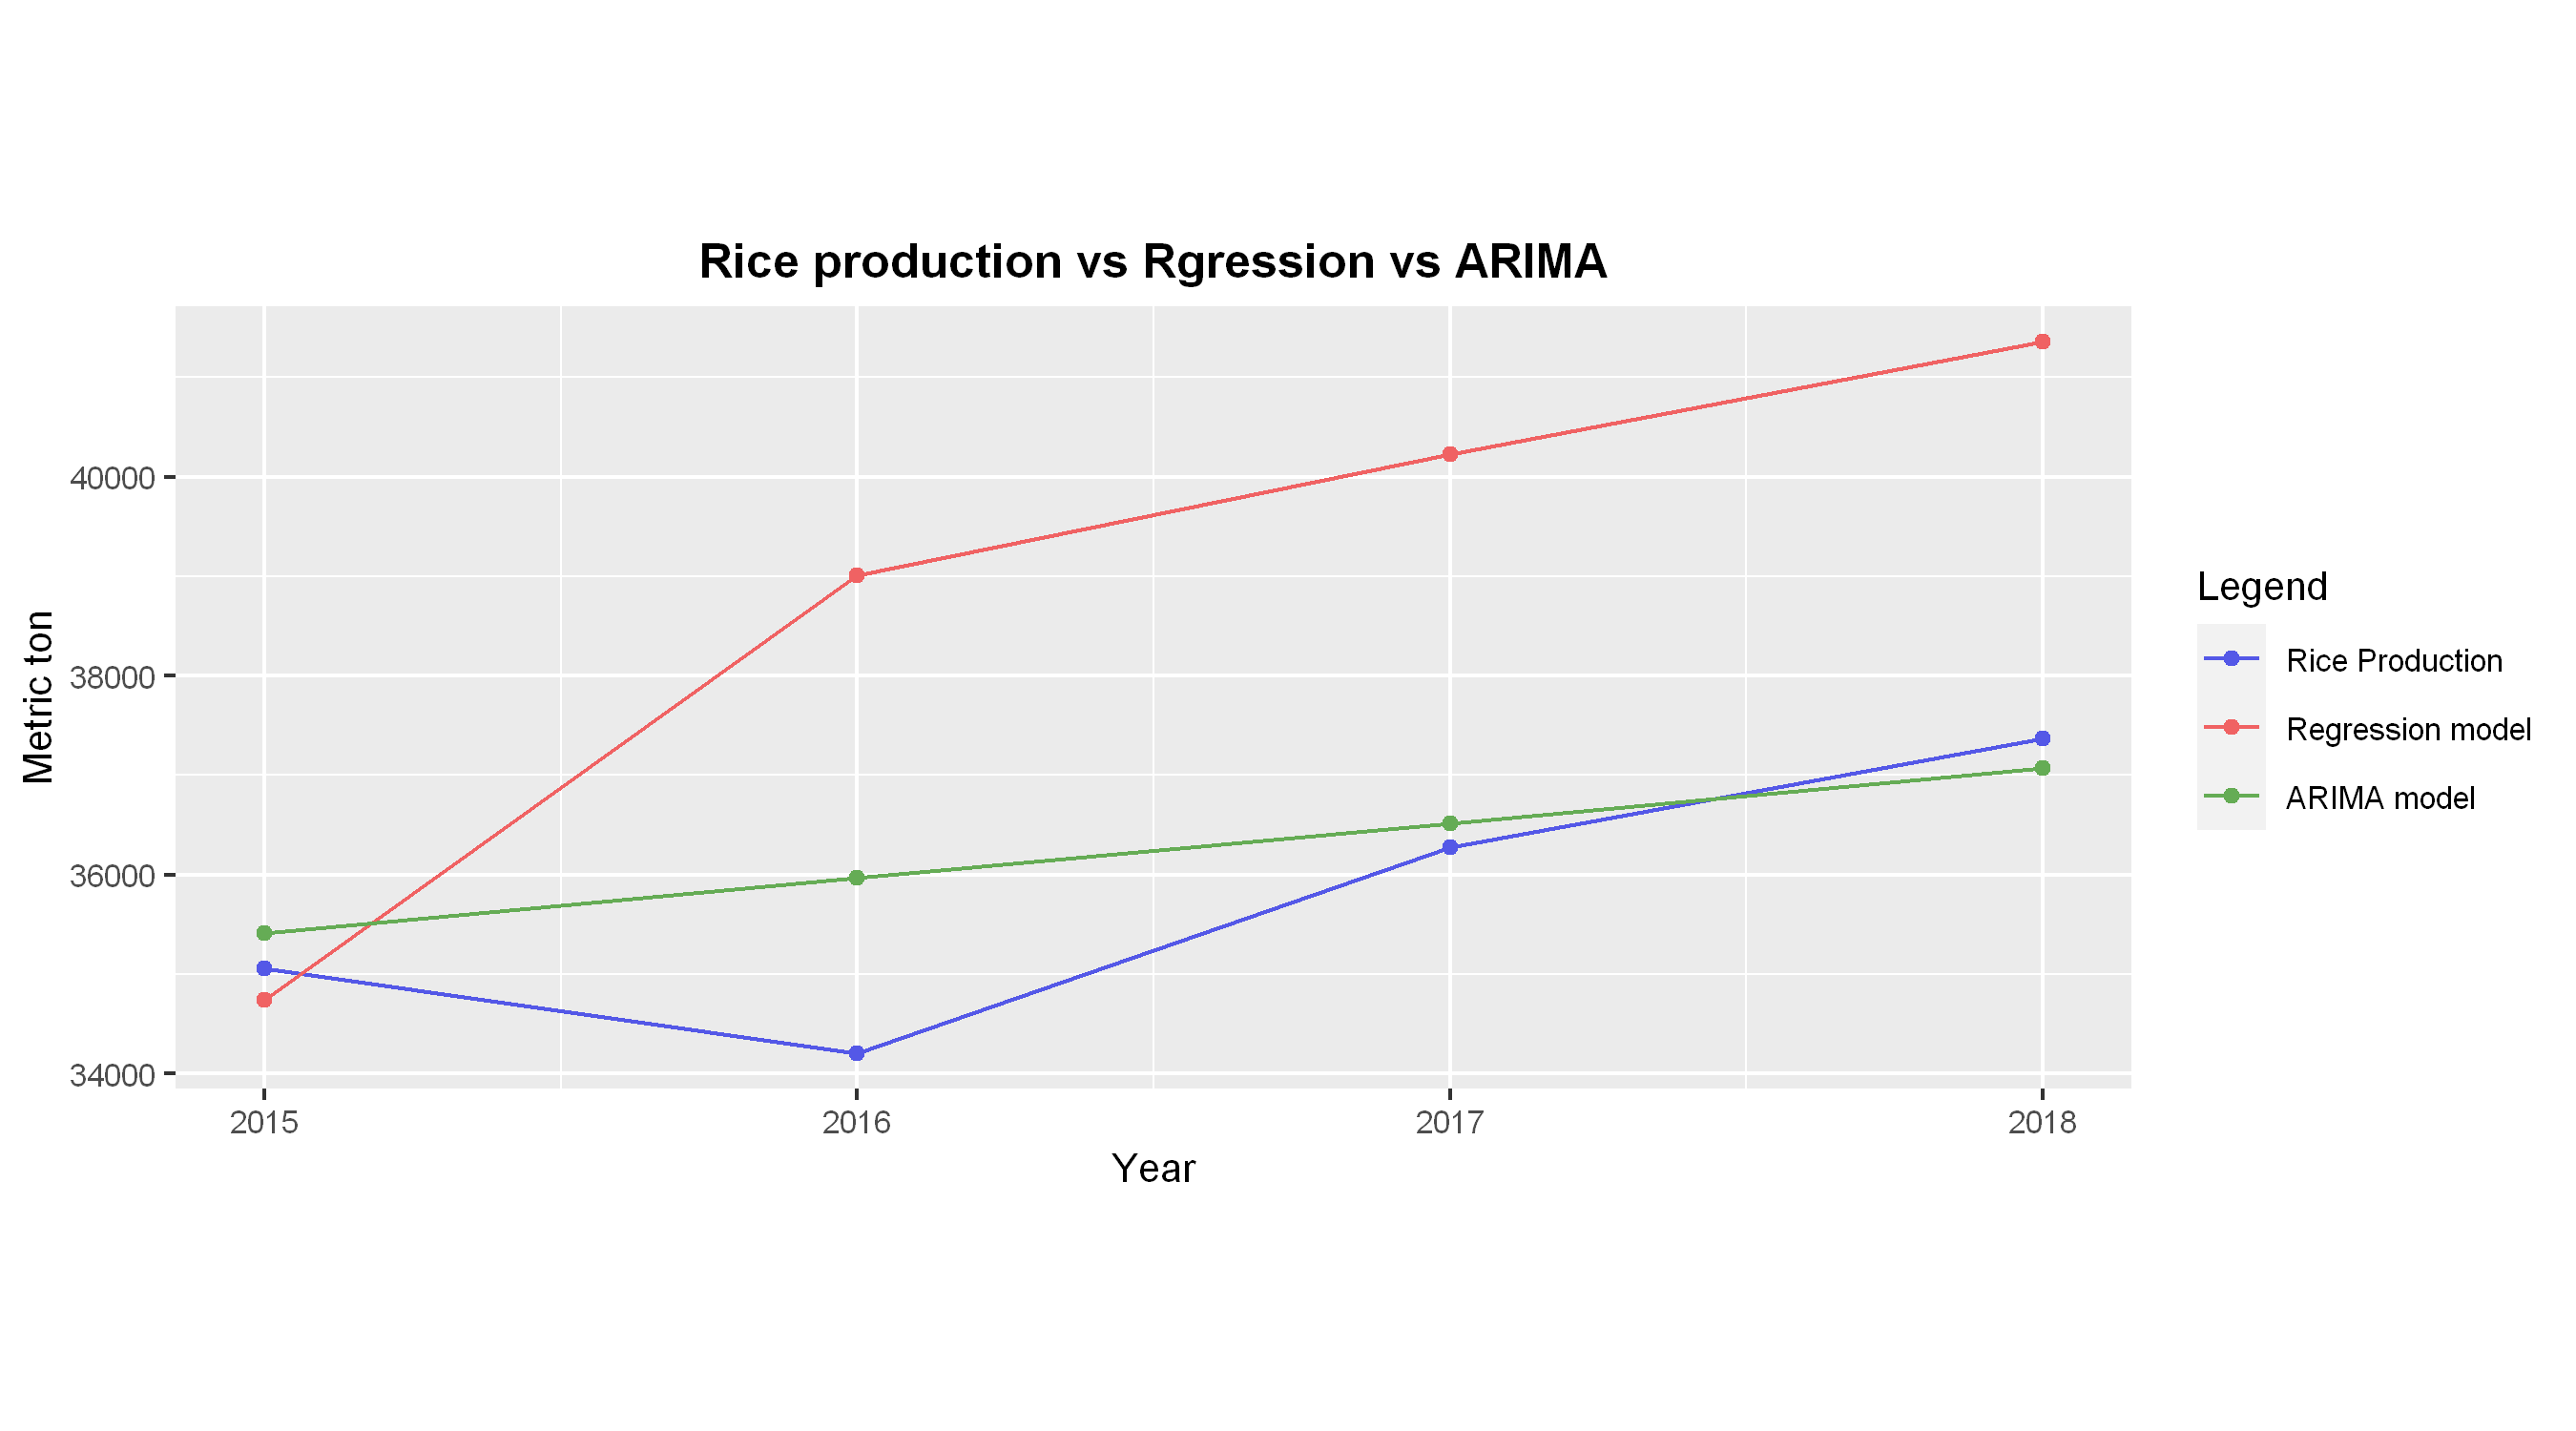

In [14]:
options(repr.plot.width = 9, repr.plot.height = 5,repr.plot.res = 300)
color <- c('Rice Production'= '#5458e7', 'Regression model'= '#f06263', 'ARIMA model' = '#65ac55')
plt <- ggplot(conc,aes(x= Year)) +geom_point(aes(y = Rice_production,color = 'Rice Production'))+ 
                                  geom_line(aes(y = Rice_production,color = 'Rice Production'))+
                                  geom_line(aes(y = reg_pred,color = 'Regression model' ))+
                                  geom_point(aes(y = reg_pred,color = 'Regression model'))+
                                  geom_line(aes(y = arima_pred,color = 'ARIMA model' ))+
                                  geom_point(aes(y = arima_pred,color = 'ARIMA model'))+
                                  labs(x= 'Year',y = 'Metric ton',color = 'Legend')+
                                  scale_color_manual(values = color) + ggtitle('Rice production vs Rgression vs ARIMA')+
                                  theme(text = element_text(size = 10), plot.title = element_text(hjust = 0.5,,face = 'bold'),
                                       aspect.ratio = .4)
plt     

In [15]:
conc['reg_error'] <- conc$Rice_production - conc$reg_pred
conc['arima_error'] <- conc$Rice_production - conc$arima_pred
conc

,Year,Rice_production,reg_pred,arima_pred,reg_error,arima_error
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
26,2015,35060.10,34741.80,35412.83,318.2967,-352.73
27,2016,34201.50,39011.35,35964.47,-4809.8491,-1762.97
28,2017,36278.50,40228.19,36516.10,-3949.6920,-237.60
29,2018,37363.72,41354.29,37067.73,-3990.5657,295.99


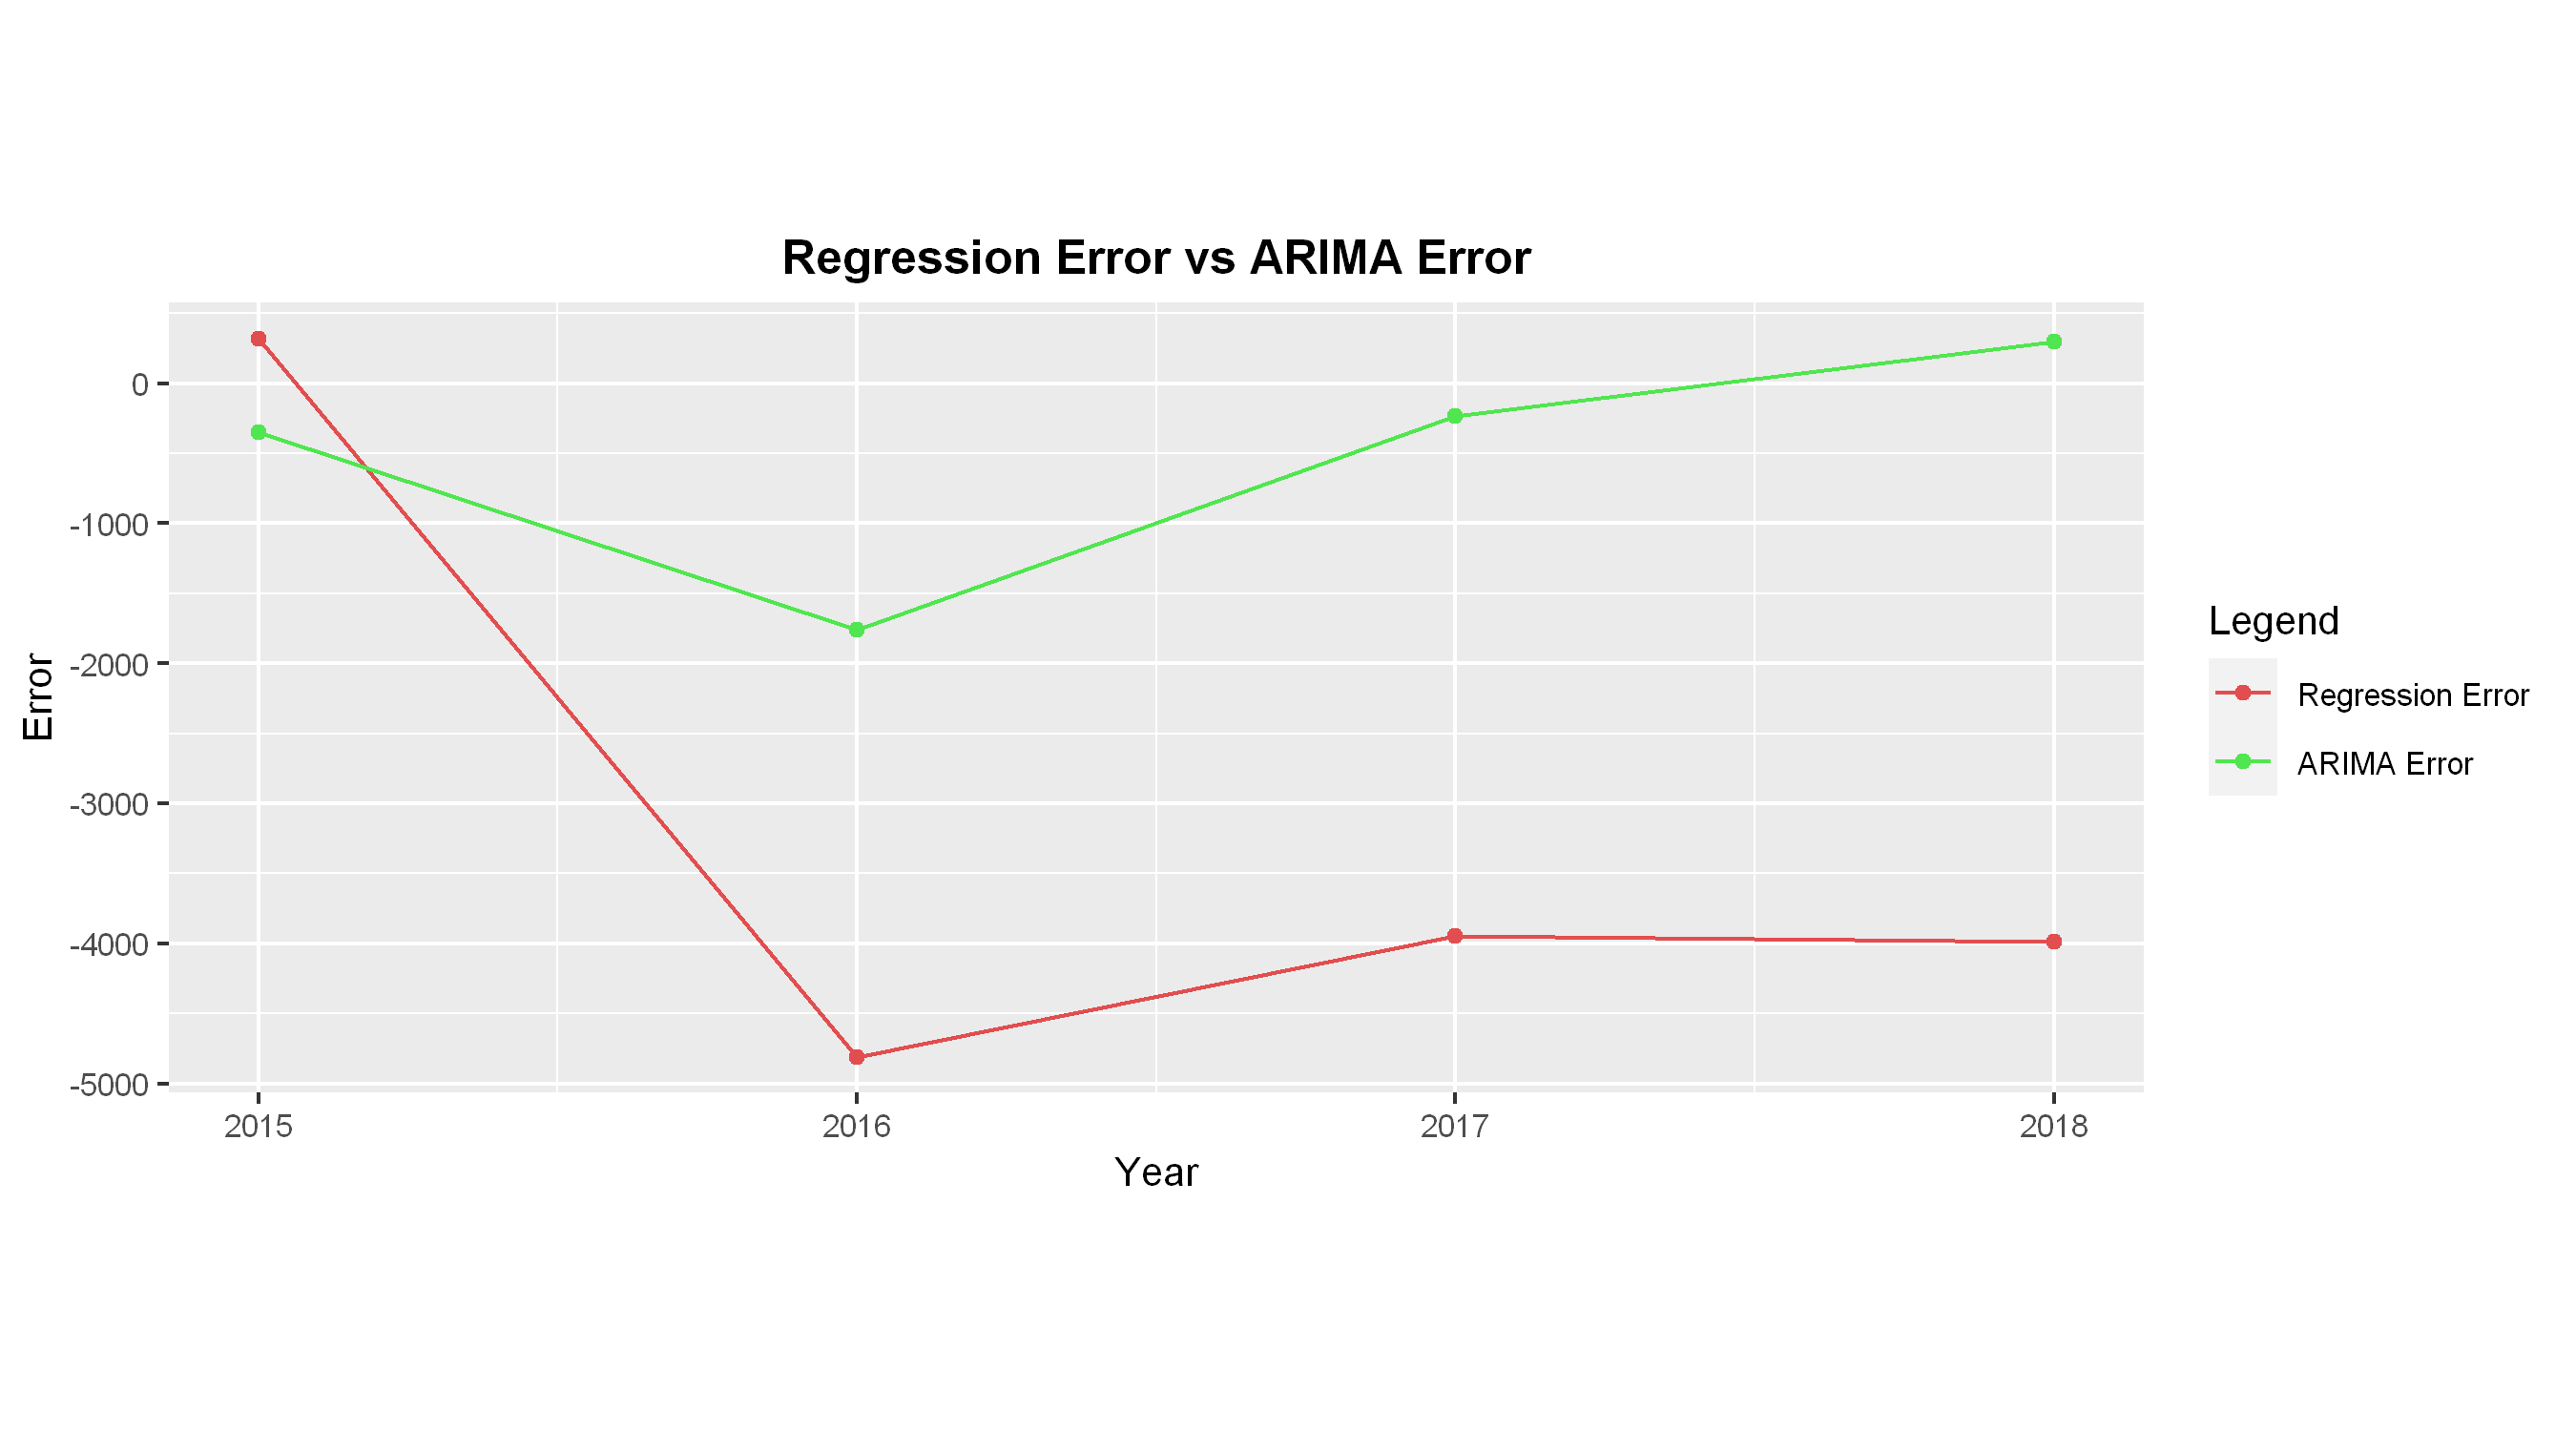

In [16]:
options(repr.plot.width = 9, repr.plot.height = 5,repr.plot.res = 300)
color <- c('Regression Error' = '#e24e4f','ARIMA Error' = '#50e64f')
plt <- ggplot(data = conc, aes(x= Year)) +geom_line(aes(y = reg_error,color = 'Regression Error' ))+
                                  geom_point(aes(y = reg_error,color = 'Regression Error'))+
                                  geom_line(aes(y = arima_error,color = 'ARIMA Error' ))+
                                  geom_point(aes(y = arima_error,color = 'ARIMA Error'))+
                                  labs(x= 'Year',y = 'Error',color = 'Legend')+
                                  scale_color_manual(values = color) + ggtitle('Regression Error vs ARIMA Error')+
                                  theme(text = element_text(size = 10), plot.title = element_text(hjust = 0.5,,face = 'bold'),
                                       aspect.ratio = .4)
plt

In [52]:
print(mean(conc$reg_error))
print(mean(conc$arima_error))

[1] -3107.953
[1] -514.3275


In [22]:
corr_mat2 <- round(cor(df[2:8]),2)
corr_mat2

,Rice_production,Population,Labor_Force,Ferti_consump,Avg_temp,Avg_rain,per_cap_inc
Rice_production,1.00,0.97,0.97,0.92,0.27,-0.22,0.83
Population,0.97,1.00,1.00,0.95,0.28,-0.27,0.82
Labor_Force,0.97,1.00,1.00,0.96,0.25,-0.26,0.86
Ferti_consump,0.92,0.95,0.96,1.00,0.08,-0.25,0.91
Avg_temp,0.27,0.28,0.25,0.08,1.00,0.00,-0.05
Avg_rain,-0.22,-0.27,-0.26,-0.25,0.00,1.00,-0.15
per_cap_inc,0.83,0.82,0.86,0.91,-0.05,-0.15,1.00


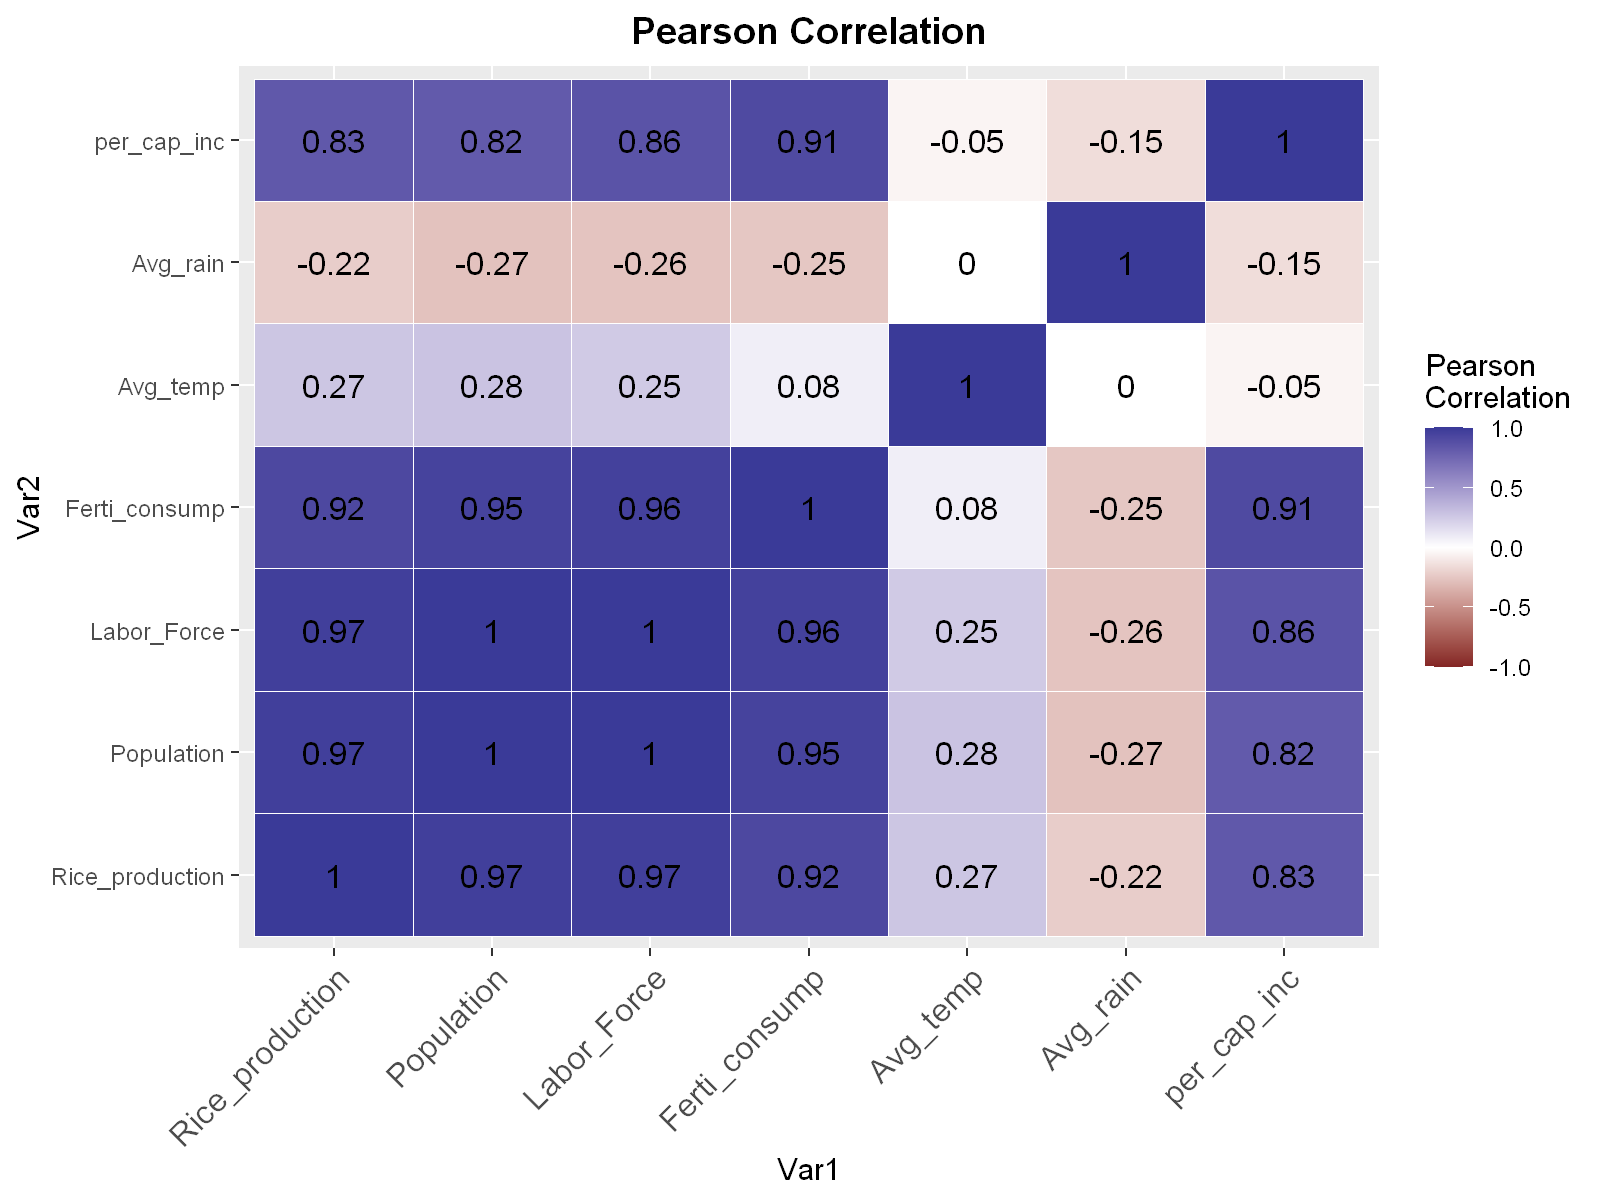

In [54]:
library(reshape2)
options(repr.plot.width = 8, repr.plot.height = 6,repr.plot.res = 200)
mlt_co <- melt(corr_mat2)
htmp <- ggplot(data = mlt_co, aes(x=Var1, y=Var2,fill=value)) +geom_tile(color = 'white') +
                                                               geom_text(aes(Var2, Var1, label = value),
                                                                         color = "black", size = 4)+
                                                               theme(axis.text.x = element_text(angle = 45, vjust = 1, 
                                                                     size = 12, hjust = 1),
                                                                     plot.title=element_text(hjust = 0.5, face = 'bold'))+
                                                               scale_fill_gradient2(name="Pearson\nCorrelation",limit = c(-1,1))+
                                                               ggtitle('Pearson Correlation')
htmp

In [35]:
 get_upper_tri <- function(cormat){
    cormat[lower.tri(cormat)]<- NA
    return(cormat)
  }

In [36]:
ucmt <- get_upper_tri(corr_mat2)
ucmt

,Rice_production,Population,Labor_Force,Ferti_consump,Avg_temp,Avg_rain,per_cap_inc
Rice_production,1,0.97,0.97,0.92,0.27,-0.22,0.83
Population,NA,1.00,1.00,0.95,0.28,-0.27,0.82
Labor_Force,NA,NA,1.00,0.96,0.25,-0.26,0.86
Ferti_consump,NA,NA,NA,1.00,0.08,-0.25,0.91
Avg_temp,NA,NA,NA,NA,1.00,0.00,-0.05
Avg_rain,NA,NA,NA,NA,NA,1.00,-0.15
per_cap_inc,NA,NA,NA,NA,NA,NA,1.00


Warning message:
"Removed 21 rows containing missing values (geom_text)."


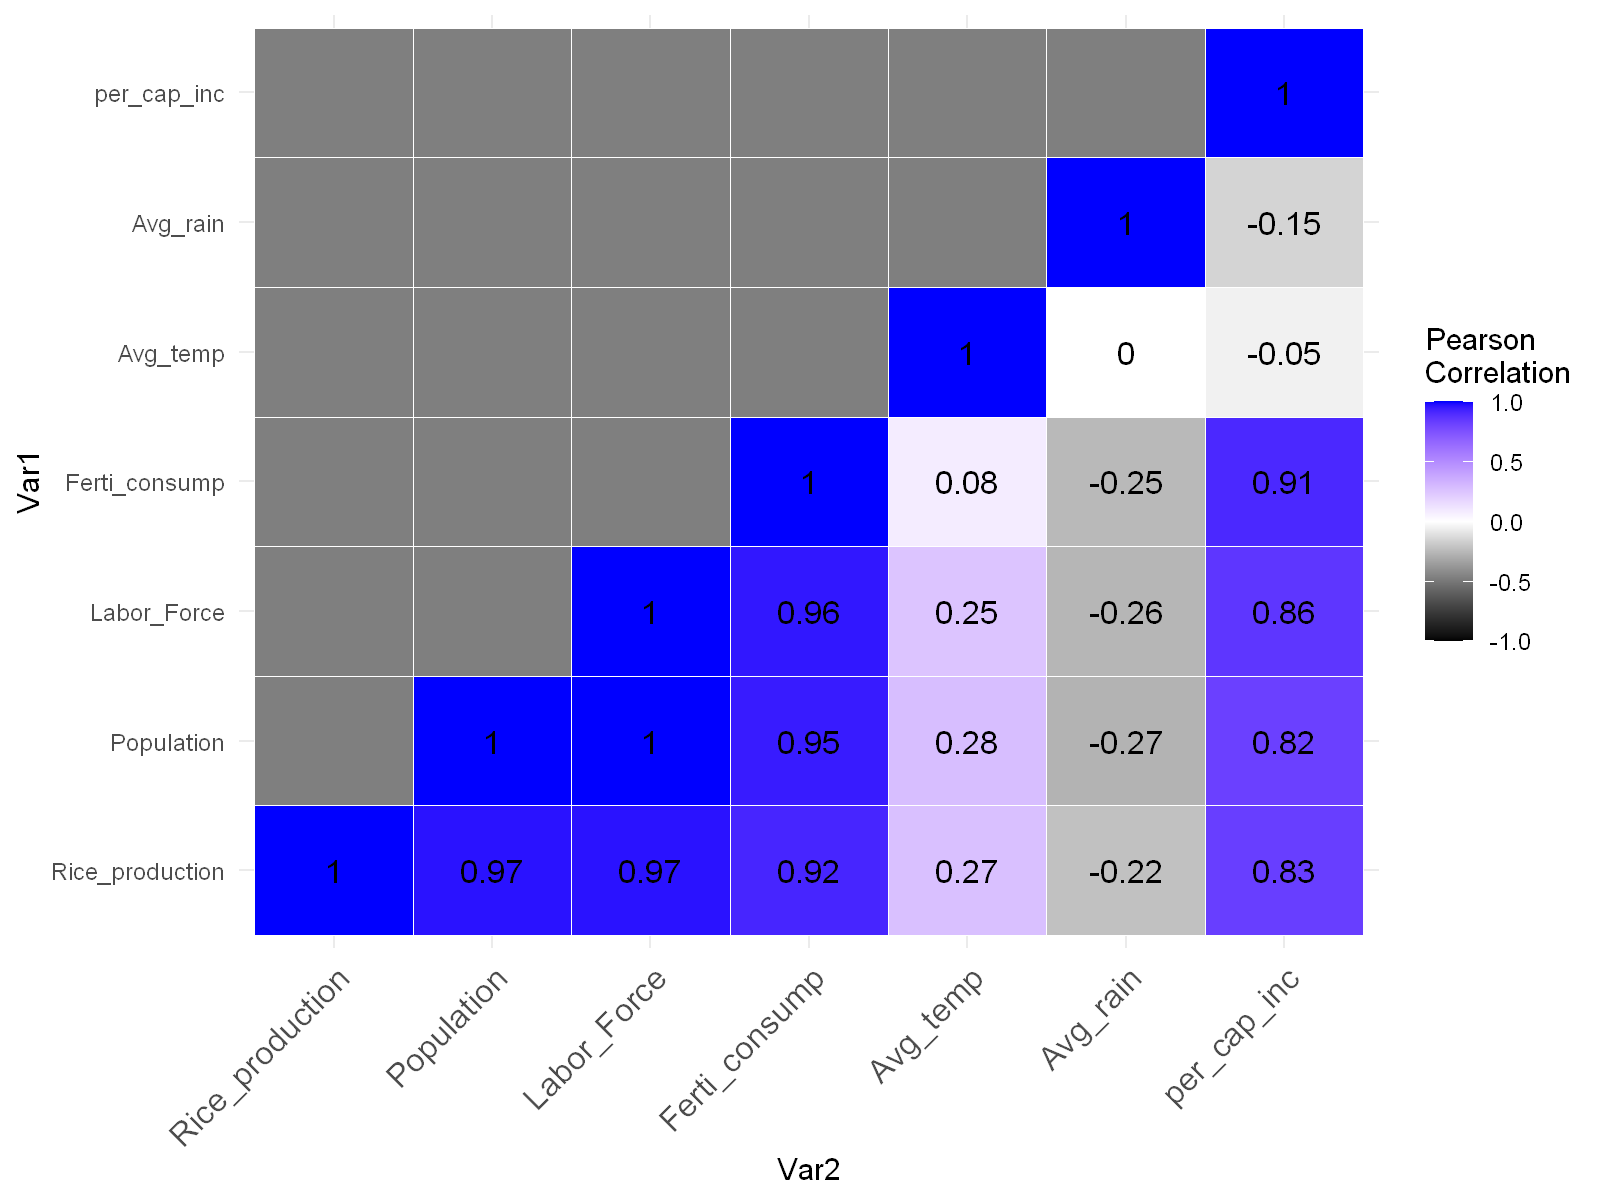

In [49]:
mlt_co <- melt(ucmt)
htmp <- ggplot(data = mlt_co, aes(Var2, Var1, fill = value))+ geom_tile(color = "white")+
                                                              scale_fill_gradient2(low = "black", high = "blue", mid = "white", 
                                                                                   midpoint = 0, limit = c(-1,1), space = "Lab", 
                                                                                    name="Pearson\nCorrelation") +
                                                              theme_minimal()+ 
                                                              theme(axis.text.x = element_text(angle = 45, vjust = 1, 
                                                                     size = 12, hjust = 1))+
                                                              geom_text(aes(Var2, Var1, label = value),
                                                                         color = "black", size = 4)
htmp

In [19]:
conc[-c(4,6),]

,Year,Rice_production,reg_pred,arima_pred,reg_error,arima_error
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
26,2015,35060.1,34741.80,35412.83,318.2967,-352.73
27,2016,34201.5,39011.35,35964.47,-4809.8491,-1762.97
28,2017,36278.5,40228.19,36516.10,-3949.6920,-237.60
